In [1]:
from datetime import datetime 
import time 
import pandas as pd 
import requests
import re
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import matplotlib as mpl
import scipy.sparse
from sklearn.decomposition import PCA


%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from scipy import stats

In [3]:
url = 'https://www.reddit.com/hot.json'

In [20]:
headers = {'User-agent': 'el muneco'}

In [21]:
res = requests.get(url, headers=header)
res

<Response [200]>

In [27]:
def scrape_reddit_posts(url_tag, header, loops, waittime, filename): 
    posts = []
    after = None
    for i in range(loops):
        print(i)
        if after == None:
            params = {}
        else:
            params = {'after': after}
        url = 'https://www.reddit.com/r/'+url_tag
        res = requests.get(url,params=params,headers=header)
        if res.status_code == 200:

            data_json = res.json()
            after = data_json['data']['after']
            for row in data_json['data']['children']:
                post = {}
                post['subreddit'] = row['data']['subreddit']
                post['title'] = row['data']['title']
                post['num_comments'] = row['data']['num_comments']
                post['ups'] = row['data']['ups']
                post['downs'] = row['data']['downs']
                post['likes'] = row['data']['likes']
                post['score'] = row['data']['score']
                post['view_count'] = row['data']['view_count']
                post['url'] = row['data']['url']
                post['time_of_pull'] = datetime.now()
                posts.append(post)
        else:
            print(res.status_code)
            break
        time.sleep(waittime)   
    df = pd.DataFrame(posts)
    now = datetime.now()
    df.to_csv(filename+now.strftime('%Y%m%d%H%S'),index=False)

In [28]:
#what happens if i run this again? how will my data frame change?
scrape_reddit_posts('football.json',header,40,1.5,'Reddit_football_')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [32]:
fut

,num_comments,score,subreddit,time_of_pull,title,ups,url
0,0,2,football,2018-12-16 15:21:10.471588,"Weekly /r/Football Discussion - December 11, 2018",2,https://www.reddit.com/r/football/comments/a5a...
1,48,34,football,2018-12-16 15:21:10.471597,Hi 🙂,34,https://www.reddit.com/r/football/comments/a6m...
2,0,2,football,2018-12-16 15:21:10.471599,Match Thread: RB Leipzig vs Mainz [Regular Sea...,2,https://www.reddit.com/r/football/comments/a6p...
3,1,2,football,2018-12-16 15:21:10.471601,Dier injury causes fans to call for January sp...,2,https://www.football.london/tottenham-hotspur-...
4,0,6,football,2018-12-16 15:21:10.471604,Ten Likely January Window Stories and how they...,6,https://theathleteshub.org/2018/12/15/10-poten...
5,12,65,football,2018-12-16 15:21:10.471609,Why River Plate’s Copa Libertadores hero Juan ...,65,https://www.goal.com/en-gb/news/why-wonderkid-...
6,4,9,football,2018-12-16 15:21:10.471612,The evolution of 4-3-3 and its impact on wide ...,9,https://www.elartedf.com/evolution-4-3-3-impac...
7,1,0,football,2018-12-16 15:21:10.471614,Chris Smalling signs a contract extension at M...,0,https://www.dribl.co/articles/breaking:-chris-...
8,4,77,football,2018-12-16 15:21:10.471616,Chelsea face partial stadium closure if Uefa f...,77,https://www.theguardian.com/football/2018/dec/...
9,0,4,football,2018-12-16 15:21:10.471618,Why Laurent Koscielny will prove he is still a...,4,https://www.goal.com/en-gb/news/why-laurent-ko...


In [30]:
scrape_reddit_posts('nfl.json',header,40,1.5,'Reddit_nfl_')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


### cleaning and EDA

In [33]:
nfl = pd.read_csv('../data/Reddit_nfl_201812161451')
nfl.drop(columns=['ups','downs', 'likes','view_count'], inplace = True)

In [34]:
fut = pd.read_csv('../data/Reddit_football_201812161530')
fut.drop(columns=['ups','downs', 'likes', 'view_count'], inplace = True)

In [35]:
#how do i treat that emoji?
fut.head(10)

,num_comments,score,subreddit,time_of_pull,title,url
0,0,2,football,2018-12-16 15:21:10.471588,"Weekly /r/Football Discussion - December 11, 2018",https://www.reddit.com/r/football/comments/a5a...
1,48,34,football,2018-12-16 15:21:10.471597,Hi 🙂,https://www.reddit.com/r/football/comments/a6m...
2,0,2,football,2018-12-16 15:21:10.471599,Match Thread: RB Leipzig vs Mainz [Regular Sea...,https://www.reddit.com/r/football/comments/a6p...
3,1,2,football,2018-12-16 15:21:10.471601,Dier injury causes fans to call for January sp...,https://www.football.london/tottenham-hotspur-...
4,0,6,football,2018-12-16 15:21:10.471604,Ten Likely January Window Stories and how they...,https://theathleteshub.org/2018/12/15/10-poten...
5,12,65,football,2018-12-16 15:21:10.471609,Why River Plate’s Copa Libertadores hero Juan ...,https://www.goal.com/en-gb/news/why-wonderkid-...
6,4,9,football,2018-12-16 15:21:10.471612,The evolution of 4-3-3 and its impact on wide ...,https://www.elartedf.com/evolution-4-3-3-impac...
7,1,0,football,2018-12-16 15:21:10.471614,Chris Smalling signs a contract extension at M...,https://www.dribl.co/articles/breaking:-chris-...
8,4,77,football,2018-12-16 15:21:10.471616,Chelsea face partial stadium closure if Uefa f...,https://www.theguardian.com/football/2018/dec/...
9,0,4,football,2018-12-16 15:21:10.471618,Why Laurent Koscielny will prove he is still a...,https://www.goal.com/en-gb/news/why-laurent-ko...


In [36]:
nfl.head(10)

,num_comments,score,subreddit,time_of_pull,title,url
0,1009,77,nfl,2018-12-16 14:47:35.865819,Game Thread: RedZone/Game hub (Week 15),https://www.reddit.com/r/nfl/comments/a6qmoi/g...
1,62,40,nfl,2018-12-16 14:47:35.865828,"Picture/GIF/Video highlights thread (Week 15, ...",https://www.reddit.com/r/nfl/comments/a6qmm0/p...
2,549,6051,nfl,2018-12-16 14:47:35.865830,[Kinkhabwala] #Patriots owner Robert Kraft fle...,https://twitter.com/AKinkhabwala/status/107431...
3,97,1573,nfl,2018-12-16 14:47:35.865832,[Redskins] Alex Smith is finally home from the...,https://twitter.com/Redskins/status/1074325817...
4,90,493,nfl,2018-12-16 14:47:35.865835,[Highlight] Rodger gets sacked by Khalil Mack'...,https://streamable.com/20frg
5,48,756,nfl,2018-12-16 14:47:35.865837,[Schefter] Cowboys’ Pro-Bowl guard Zack Martin...,https://twitter.com/adamschefter/status/107432...
6,667,6761,nfl,2018-12-16 14:47:35.865839,[Highlight] Peppers sacks Keenum to seal the B...,https://streamable.com/kuvno
7,163,395,nfl,2018-12-16 14:47:35.865841,[Rapoport] The #Ravens are going to treat Joe ...,https://twitter.com/rapsheet/status/1074346008...
8,268,4037,nfl,2018-12-16 14:47:35.865843,[Koenigsberg] For the first time in more than ...,https://twitter.com/RyanKoenigsberg/status/107...
9,69,337,nfl,2018-12-16 14:47:35.865845,"[Dvorak] During a previous Jags/Skins game, Da...",https://twitter.com/CurtisDvorak/status/107434...


In [37]:
frames = [fut,nfl]
df = pd.concat(frames)

In [38]:
df['is_juve'] = df['subreddit'].map(lambda x: 1 if x == 'football' else 0)

In [39]:
df.head()

,num_comments,score,subreddit,time_of_pull,title,url,is_juve
0,0,2,football,2018-12-16 15:21:10.471588,"Weekly /r/Football Discussion - December 11, 2018",https://www.reddit.com/r/football/comments/a5a...,1
1,48,34,football,2018-12-16 15:21:10.471597,Hi 🙂,https://www.reddit.com/r/football/comments/a6m...,1
2,0,2,football,2018-12-16 15:21:10.471599,Match Thread: RB Leipzig vs Mainz [Regular Sea...,https://www.reddit.com/r/football/comments/a6p...,1
3,1,2,football,2018-12-16 15:21:10.471601,Dier injury causes fans to call for January sp...,https://www.football.london/tottenham-hotspur-...,1
4,0,6,football,2018-12-16 15:21:10.471604,Ten Likely January Window Stories and how they...,https://theathleteshub.org/2018/12/15/10-poten...,1


In [40]:
#this is good, pretty even classification 
df['subreddit'].value_counts(normalize=False)

nfl         999
football    984
Name: subreddit, dtype: int64

In [41]:
df[['football' in each.lower() for each in df['title']]].groupby('subreddit').count()

,num_comments,score,time_of_pull,title,url,is_juve
subreddit,,,,,,
football,189,189,189,189,189,189
nfl,28,28,28,28,28,28


In [42]:
[title for title in df[df['subreddit'] == 'nfl']['title']]

['Game Thread: RedZone/Game hub (Week 15)',
 'Picture/GIF/Video highlights thread (Week 15, Sunday)',
 '[Kinkhabwala] #Patriots owner Robert Kraft flew in to Pittsburgh early yesterday to visit the Tree of Life synagogue, where a gunman massacred 11 people. He then attended services at Rodef Shalom, and when invited to speak by the rabbi, he did. I’m told he even spoke partly in Hebrew. #bridges',
 '[Redskins] Alex Smith is finally home from the Hospital',
 "[Highlight] Rodger gets sacked by Khalil Mack's back",
 '[Schefter] Cowboys’ Pro-Bowl guard Zack Martin will miss the first football game at any level of career today in Indianapolis. Never missed one in high school, at Notre Dame, or in NFL.',
 '[Highlight] Peppers sacks Keenum to seal the Browns win',
 '[Rapoport] The #Ravens are going to treat Joe Flacco with class and trading him to a team of his choice is also possible (and his salary makes that doable).',
 '[Koenigsberg] For the first time in more than 10,000 days, the Clevel

In [43]:
[title for title in df[df['subreddit'] == 'football']['title'] if 'football' in title.lower()]

['Weekly /r/Football Discussion - December 11, 2018',
 'Football streaming?',
 'Crazy dudes doing football tricks in mid-air',
 'Should I join a football club?',
 'Lost of Interest to watch real madrid champions league in 18/19 maybe because that ronaldo left to juventus or not. Maybe that i am losing interest of football since ronaldo left, and no more rival between messi and ronaldo since i watch from 2011.',
 'Football walkout song poll',
 'The Data Day: Awesome Azpi | Official Site | Chelsea Football Club',
 'River Plate 3-1 Boca Juniors (5-3 agg): Copa Libertadores final, second leg – live! | Football',
 'Why Do You Wear Football Kits?',
 'Neymar wants to play in England - Football News Scorenga UK',
 'The man who dribbled into battle: a previously untold story of football in WWI',
 "City can't always play fantasy football, says Kompany as the champions beat Watford",
 "'A brighter future for amputee football: Owen Coyle Jr discusses why he only sees growth for the sport'",
 'Foot

In [44]:
CR7=(len(df[df['title'].str.contains('Ronaldo')]['title']))

Messi= (len(df[df['title'].str.contains('Messi')]['title']))

print(f'Messi was found in {Messi} post titles')
print('')
print(f'Cristiano was found in {CR7} post titles')


Messi was found in 27 post titles

Cristiano was found in 31 post titles


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1983 entries, 0 to 998
Data columns (total 8 columns):
num_comments    1983 non-null int64
score           1983 non-null int64
subreddit       1983 non-null object
time_of_pull    1983 non-null object
title           1983 non-null object
ups             1983 non-null int64
url             1983 non-null object
is_juve         1983 non-null int64
dtypes: int64(4), object(4)
memory usage: 139.4+ KB


In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_comments,1983.0,108.003026,730.484308,0.0,2.0,13.0,48.0,23801.0
score,1983.0,260.022189,975.844598,0.0,2.0,18.0,88.0,12408.0
is_juve,1983.0,0.496218,0.500112,0.0,0.0,0.0,1.0,1.0


### Splitting my X

In [45]:
#setting up X and y
X = df['title']
y = df['is_juve']

In [46]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=.33, stratify=y)

### CountVectorizer

In [47]:
cv = CountVectorizer(stop_words='english')
                     
cv.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [48]:
#removing the noise
from sklearn.feature_extraction import stop_words
len(stop_words.ENGLISH_STOP_WORDS)

318

In [49]:
X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)

In [124]:
# count of words, with ngram_range
# pd.DataFrame(X_train_cv.todense(), 
#              columns=cv.get_feature_names()).sum().sort_values(ascending=False).head(10)

game thread            22
premier league         20
real madrid            18
champions league       18
week 15                17
manchester city        15
nations league         15
manchester united      14
match thread           13
football discussion    13
dtype: int64

In [50]:
# count of words without ngram_range 
pd.DataFrame(X_train_cv.todense(), 
             columns=cv.get_feature_names()).sum().sort_values(ascending=False).head(10)

football    151
nfl         126
game        113
season       78
week         68
league       64
team         58
vs           53
new          50
games        50
dtype: int64

Modeling

In [51]:
#this is my baseline
y_train.value_counts(normalize=True)[0:1]

0    0.503765
Name: is_juve, dtype: float64

### seeing if i can get a harmonic mean, no bueno
ValueError: Harmonic mean only defined if a
ll elements greater than zero"
```stats.hmean(y_train)```

### LogisReg

In [52]:
lr = LogisticRegressionCV(cv=5, Cs=100)
lr.fit(X_train_cv, y_train)

LogisticRegressionCV(Cs=100, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [53]:
lr.score(X_train_cv,y_train), lr.score(X_test_cv, y_test)

(0.9984939759036144, 0.9618320610687023)

In [54]:
probas = lr.predict_proba(X_train_cv)
scores = pd.DataFrame(probas, columns=['class_1', 'class_2'])
scores.head()

,class_1,class_2
0,0.945020,0.054980
1,0.054337,0.945663
2,0.000210,0.999790
3,0.024061,0.975939
4,0.021882,0.978118


In [55]:
X_train_text = pd.DataFrame(X_train_cv.todense(), columns=cv.get_feature_names())
X_train_text.head()

,000,004,01,026,03,04,054,07,09,10,...,zidane,zim,zimmer,zinedine,zoff,zone,zrebiec,élber,özil,čech
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Trying some plots for lr

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


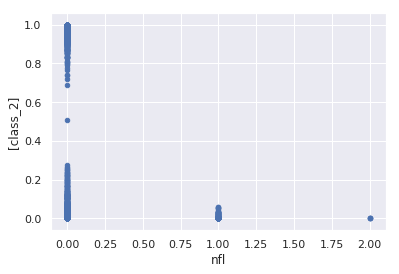

In [59]:
# plot logistic reg's classifiers
text_preds = X_train_text.copy()
text_preds['class_1'] = scores['class_1']
text_preds['class_2'] = scores['class_2']
text_preds.index = y_train

text_preds.sort_values('class_2').plot(kind="scatter", x="nfl", y=['class_2'])

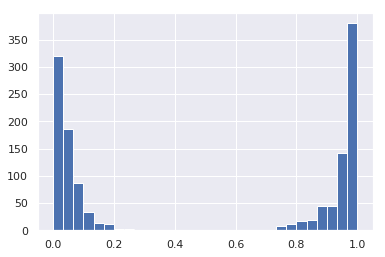

In [63]:
text_preds['class_1'].hist(bins=30);
#look at probability of y given X(pick one variable at a time)

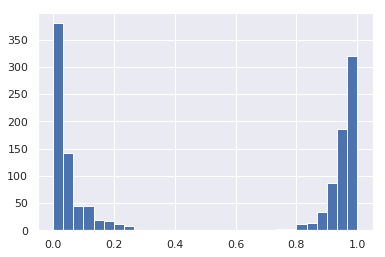

In [64]:
plt.figure()
text_preds['class_2'].hist(bins=30);

In [485]:
# fig, ax = plt.subplots(figsize=(60,60))
# ax.spy(X_train_cv)

### I need help fully understanding this 

In [65]:
y_hat = lr.predict(X_test_cv)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       330
           1       0.93      1.00      0.96       325

   micro avg       0.96      0.96      0.96       655
   macro avg       0.96      0.96      0.96       655
weighted avg       0.96      0.96      0.96       655



### what do i need to do get my FP & FN improved

In [66]:
#confusion matrix, by removing a repeat column i was able to decrease by TN from 25 to 23, but they moved to FP
cm = confusion_matrix(y_test,y_hat)
cm


array([[305,  25],
       [  0, 325]])

In [133]:
lr.coef_[0]

array([ 1.30225800e-01, -6.04964503e-04,  1.66880056e-01, ...,
        1.47508732e-01,  1.07605777e+00,  3.14205585e-01])

In [67]:
import numpy as np

coef_df = pd.DataFrame({
    'coef' : cv.get_feature_names(),
    'val': lr.coef_[0],
    'val_abs': np.abs(lr.coef_[0])
})
coef_df.sort_values('val_abs', ascending=False)

,coef,val,val_abs
2211,nfl,-3.921667e+00,3.921667e+00
1560,highlight,-2.713815e+00,2.713815e+00
353,austrian,-2.306913e+00,2.306913e+00
2550,qb,-2.184726e+00,2.184726e+00
833,countries,-2.132198e+00,2.132198e+00
1132,england,2.006525e+00,2.006525e+00
1736,jets,-1.998408e+00,1.998408e+00
1311,football,1.943023e+00,1.943023e+00
685,chargers,-1.934599e+00,1.934599e+00
2054,match,1.808135e+00,1.808135e+00


In [109]:
#df[df['title'].str.contains('Texans')].head


### Pipe it up

In [68]:
pipe = Pipeline([
    ('cv', CountVectorizer(stop_words= 'english', 
                           ngram_range= (2,2))),
    ('lr', LogisticRegressionCV(cv=5, Cs=100))
])
pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test,y_test)

(0.9879518072289156, 0.9022900763358779)

In [69]:
pipe.predict(['football'])

array([0])

### DecisionTree 
    1)use the esemble methods to see how they perform. 
    2)Look at the feature importances.(cant look these up bc its only one tree) 
    3)Sort the values. 

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,ExtraTreesClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [71]:
tree = DecisionTreeClassifier(max_depth=30)

In [72]:
tree.fit(X_train_cv, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=30,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [73]:
tree.score(X_train_cv, y_train), tree.score(X_test_cv, y_test)

(0.8975903614457831, 0.8427480916030534)

In [74]:
cross_val_score(tree, X_train_cv, y_train, cv=3, error_score='raise').mean()

0.8328124095618451

In [75]:
tree.fit(X_train_cv,y_train)
tree.score(X_train_cv, y_train), tree.score(X_test_cv, y_test)

(0.8975903614457831, 0.8427480916030534)

In [76]:
y_hat = tree.predict_proba(X_test_cv)
scores = pd.DataFrame(y_hat, columns=['class_1', 'class_2'])
scores['y_hat'] = tree.predict(X_test_cv)

# scores.query('y != y_hat')
test_text = pd.DataFrame(X_test_cv.toarray(), columns=cv.get_feature_names())
# test_text.loc[:, 'class_1'] = scores['class_1']
# scores = pd.concat([test_text, scores], axis=1, ignore_index=True)
#scores.index = y_test
# test_text.head()

for col in ['class_1', 'class_2', 'y_hat']:
    test_text[col] = scores[col]

test_text.index = y_test
test_text.head()

,000,004,01,026,03,04,054,07,09,10,...,zinedine,zoff,zone,zrebiec,élber,özil,čech,class_1,class_2,y_hat
is_juve,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.215873,0.784127,1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.000000,0.000000,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.000000,0.000000,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,1.000000,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0.215873,0.784127,1


In [77]:
columns_select = [col for col in test_text.columns if col not in ['y_hat', 'class_1', 'class_2']]
test_text[(test_text.index == 0) & (test_text['y_hat'] == 1)][columns_select].sum().sort_values(ascending=False).head()

year     9
week     8
win      7
yards    7
teams    6
dtype: int64

### Misclassication by original text

In [79]:
#had to do this because i kept gettingerror: cant something on duplicate axis. 
df = df.reset_index()

In [80]:

pipe = Pipeline([
    ('cv', CountVectorizer(stop_words= 'english', 
                           ngram_range= (1,1))),
    ('tree', DecisionTreeClassifier(max_depth=50))
])
model = pipe.fit(df['title'], df['is_juve'])
scores = df.copy()
scores['y_hat'] = model.predict(df['title'])
scores[(scores['is_juve'] == 0) & (scores['y_hat'] == 1)]

,index,num_comments,score,subreddit,time_of_pull,title,url,is_juve,y_hat
994,10,213,525,nfl,2018-12-16 14:47:35.865847,Big ben has fractured ribs,https://larrybrownsports.com/football/ben-roet...,0,1
1053,69,3,22,nfl,2018-12-16 14:47:39.749600,After catching 0 touchdowns in his first 7 gam...,https://www.reddit.com/r/nfl/comments/a6s1w0/a...,0,1
1094,110,6,9,nfl,2018-12-16 14:47:43.371940,[Hodkiewicz] Aaron Jones is out with a knee in...,https://twitter.com/WesHod/status/107438728843...,0,1
1097,113,484,1732,nfl,2018-12-16 14:47:43.371947,[Baker Mayfield on Instagram:] “Ride with me C...,https://www.instagram.com/p/BrZX2V1gDv3/?utm_s...,0,1
1101,117,5,15,nfl,2018-12-16 14:47:43.371955,Saturday Night Commentary Crews,https://www.reddit.com/r/nfl/comments/a6plmp/s...,0,1
1119,135,70,156,nfl,2018-12-16 14:47:45.185681,All of Houston's losses this year have been de...,https://www.reddit.com/r/nfl/comments/a6km4q/a...,0,1
1130,146,27,6,nfl,2018-12-16 14:47:45.185713,Is Laquon Treadwell a Bust?,https://www.reddit.com/r/nfl/comments/a6q8e6/i...,0,1
1134,150,97,548,nfl,2018-12-16 14:47:45.185723,Peyton Manning urges Matthew Stafford not to s...,https://profootballtalk.nbcsports.com/2018/12/...,0,1
1143,159,19,111,nfl,2018-12-16 14:47:46.990032,Jason Myers is on pace to become the first kic...,https://www.reddit.com/r/nfl/comments/a6k5z4/j...,0,1
1149,165,29,2,nfl,2018-12-16 14:47:46.990044,Why do missed FGs get taken over from the kick...,https://www.reddit.com/r/nfl/comments/a6rco7/w...,0,1


In [81]:
# pipe.named_steps['cv'].get_feature_names() - get text token names
# pipe.named_steps['cv'].fit_transform(df['title']) - get X+text matrix
X_text = pd.DataFrame(pipe.named_steps['cv'].fit_transform(df['title']).toarray(), columns=pipe.named_steps['cv'].get_feature_names())
X_text['is_juve'] = scores['is_juve']
X_text['y_hat'] = scores['y_hat']
X_text[(X_text['is_juve'] == 0) & (X_text['y_hat'] == 1)].sum().sort_values(ascending=False).head(17)
#these particular tokens are misclassified, or commonly occuring within misclassified documents. 

y_hat      124
play         7
year         6
new          5
time         5
injury       5
30           4
video        4
just         4
kick         4
doo          4
great        4
games        4
center       4
10           4
watson       3
oakland      3
dtype: int64

In [82]:
scores[scores['title'].str.contains("juventus")]

,index,num_comments,score,subreddit,time_of_pull,title,url,is_juve,y_hat
31,31,3,0,football,2018-12-16 15:21:12.412671,Lost of Interest to watch real madrid champion...,https://www.reddit.com/r/football/comments/a5j...,1,1
564,564,3,0,football,2018-12-16 15:21:59.213970,Lost of Interest to watch real madrid champion...,https://www.reddit.com/r/football/comments/a5j...,1,1


In [83]:
model.score(df['title'], df['is_juve'])

0.9374684820978316

In [178]:
#print(classification_report(scores['is_juve'], scores['y_hat']))

### Bagging using sklearn

In [84]:
bag = BaggingClassifier()
bag.fit(X_train_cv,y_train)
bag.score(X_train_cv, y_train), bag.score(X_test_cv, y_test)

(0.9932228915662651, 0.9038167938931297)

In [85]:
#Variance got better.
bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,min_samples_leaf=2))
bag.fit(X_train_cv, y_train)
bag.score(X_train_cv,y_train), bag.score(X_test_cv, y_test)

(0.7311746987951807, 0.7099236641221374)

In [86]:
# tuned parameter with n_estimators, scores got a little better  
bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10), 
                        n_estimators=30,bootstrap_features=False)
bag.fit(X_train_cv, y_train)
bag.score(X_train_cv,y_train), bag.score(X_test_cv, y_test)

(0.8215361445783133, 0.7954198473282442)

In [87]:
bag = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=10, weights='distance'))
bag.fit(X_train_cv,y_train)
bag.score(X_train_cv, y_train), bag.score(X_test_cv, y_test)

(0.9661144578313253, 0.6076335877862595)

In [88]:
len(bag.predict(X_train_cv))

1328

In [89]:
predictions = bag.predict(X_train_cv)
predictions

array([0, 1, 1, ..., 0, 0, 0])

In [156]:
predictions.shape

(1328,)

In [90]:
bag.predict_proba(X_train_cv)

array([[0.6392615 , 0.3607385 ],
       [0.        , 1.        ],
       [0.0098085 , 0.9901915 ],
       ...,
       [0.61965245, 0.38034755],
       [0.66136671, 0.33863329],
       [0.8       , 0.2       ]])

### Train a RanFor or ExTrees

In [91]:
rf = RandomForestClassifier()
et = ExtraTreesClassifier()

In [92]:
cross_val_score(rf,X_train_cv,y_train,cv=3).mean()

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8923015637927336

In [93]:
cross_val_score(et,X_train_cv,y_train,cv=3).mean()

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9133921670769367

In [94]:
np.sqrt(len(X_train))

36.4417343165772

In [95]:
np.log2(len(X_train))

10.375039431346925

###  Grid Search on  
 `ExtraTreesClassifier()` b/c it gave me a better cross val. 

In [96]:
et = ExtraTreesClassifier()
et_params = {
    'n_estimators': [3,6,10],
    'max_depth': [None, 1,2,3,4,5],
    'min_samples_split': [2,3,4,5],
    'min_samples_leaf' : [1,5,10]
    
}
gs =GridSearchCV(et, param_grid=et_params, cv=10)
gs.fit(X_train_cv, y_train)
print(gs.best_score_)
gs.best_params_

0.9299698795180723


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 10}

In [97]:
#gs.best_estimator_.feature_importances_
gs.score(X_train_cv, y_train) ,gs.score(X_test_cv,y_test)

(1.0, 0.9450381679389313)

In [98]:
feature_importances = pd.DataFrame(gs.best_estimator_.feature_importances_,
                                   index = cv.get_feature_names(),
                                    columns=['importance']).sort_values('importance',ascending=False)

In [100]:
feature_importances[feature_importances['importance'] == 0.0].head()

,importance
programmes,0.0
bello,0.0
problems,0.0
believed,0.0
scenarios,0.0


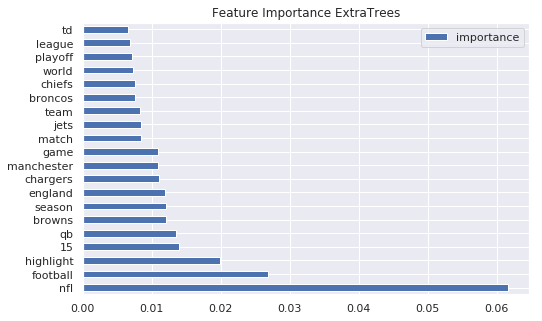

In [101]:

feature_importances[feature_importances['importance'] > 0].head(20).plot(kind='barh', title= 'Feature Importance ExtraTrees',figsize=(8,5));

In [104]:
# word cloud 
!pip install wordcloud

    100% |████████████████████████████████| 163kB 4.2MB/s ta 0:00:01


In [124]:
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator 

In [126]:
text = ['Game Thread: RedZone/Game hub (Week 15)',
 'Picture/GIF/Video highlights thread (Week 15, Sunday)',
 '[Kinkhabwala] #Patriots owner Robert Kraft flew in to Pittsburgh early yesterday to visit the Tree of Life synagogue, where a gunman massacred 11 people. He then attended services at Rodef Shalom, and when invited to speak by the rabbi, he did. I’m told he even spoke partly in Hebrew. #bridges',
 '[Redskins] Alex Smith is finally home from the Hospital',
 "[Highlight] Rodger gets sacked by Khalil Mack's back",
 '[Schefter] Cowboys’ Pro-Bowl guard Zack Martin will miss the first football game at any level of career today in Indianapolis. Never missed one in high school, at Notre Dame, or in NFL.',
 '[Highlight] Peppers sacks Keenum to seal the Browns win',
 '[Rapoport] The #Ravens are going to treat Joe Flacco with class and trading him to a team of his choice is also possible (and his salary makes that doable).',
 '[Koenigsberg] For the first time in more than 10,000 days, the Cleveland Browns have beaten the Denver Broncos.',
 '[Dvorak] During a previous Jags/Skins game, Dan Snyder once got so triggered by a mascot skit that he paid for extra video crew to spend an entire game recording only the actions of that mascot. He then sent that tape and a letter to the league requesting the mascot be fired',
 'Big ben has fractured ribs',
 '[Ruiter] Mayfield on NFL Network: "People love the Browns &amp; have stuck with them through some bad years. I\'m going to do whatever I can to turn that around. I don\'t know what that feels like. I don\'t know what they went through. And I don\'t ever want to know what that feels like"',
 '[Rapoport] “Giants QB Eli Manning may be playing his way onto the roster in 2019, which seemed crazy just a few months ago. Interesting decision looming this offseason.”',
 '[Highlight] Lead blocker Marcus Mariota obliterates Alec Ogletree',
 '[Update] #Jaguars RB Carlos Hyde is a healthy scratch today. CLE got a free 5th-round pick.',
 '[Highlight] Baker Mayfield helps undress Phillip Lindsay for a jersey swap',
 'Gregg Williams now has more wins as Browns Coach after 6 games than Hue Jackson did in 2 1/2 seasons',
 'Game Thread: Green Bay Packers (5-7-1) at Chicago Bears (9-4)',
 "[Edelman] Julian Edelman's cleats today will commemorate the lives lost at the Tree of Life shooting",
 '[Schefter] Redskins’ QB Alex Smith has been released from the hospital after surgeries and infection, sources tell @john_keim and me. His football future remains uncertain.',
 'In their first game after firing Flip. The Vikings just became the first team to have 200+ total yards in the first quarter.',
 'Post Game Thread: Cleveland Browns (6-7-1) at Denver Broncos (6-8)',
 '[Update] Former #Vikings OC John DeFilippo is no longer a top head coaching candidate after getting fired, per @JayGlazer. #Patriots OC Josh McDaniels is back in consideration for head coaching positions.',
 '[Highlight] Jabrill Pepper sacks Keenum on 4th down! The Browns win!',
 "After losing 2 QB's to broken legs, and dropping 4 straight games, the Redskins are still only a 0.5 game out of the playoffs.",
 '[Rapoport] Gregg Williams has been offered a lot of head-coaching jobs and we all laughed… Well… He’s 4-2 right now with the Browns\u2060 \u2060 who are actually in the playoff race for real. His interview will be a real one.',
 'Game Thread: Dallas Cowboys (8-5) at Indianapolis Colts (7-6)',
 '[Harrison] Many people thought J.J. Watt would not get back to his previous level after all the injury problems. He has 14.5 sacks, 55 tackles, and six forced fumbles.',
 'Game Thread: Miami Dolphins (7-6) at Minnesota Vikings (6-6-1)',
 "Baker Mayfield has 21 TDs on the season. He needs 6 more in the next 2 games to beat Manning's rookie TD record.",
 '[Bowen] Since Week 7, no team in the NFL has allowed fewer points than the Colts. Allowing just 17.1 points per game as the Colts have won 6 of 7 during this stretch.',
 'For the First time in 3 and a half Years, the Browns have won a game outside the State of Ohio.',
 '[Highlight] Minkah Fitzpatrick 50-yard pick 6, his 1st ever',
 '[Slater] Just talked to Cowboys LB Sean Lee who says he is excited to finally be back after injuring his hamstring Week 9 against the Titans. He tells me he will not start today though. Team sources tell me Lee told the team he didn’t want to disrupt Leighton Vander Esch’s progress',
 '[Vikings PR] Kirk Cousins is now the 7th #Vikings QB to throw 25+ TDs in a single-season. The last was Brett Favre in 2009.',
 'Von Miller breaks Broncos all time career sack record',
 'Immediately following a stretch of 4 wins in 52 games, the Cleveland Browns have won 4 of their last 5 games.',
 'For the first time since 1970, the Browns will finish a season undefeated in primetime games (min. 2 games)',
 '[Vikings PR] With 202 total offensive yards in the 1st quarter Minnesota becomes the first team in the NFL this season to put up over 200 yards of offense in the 1st quarter of any game. The previous high was 194 yards, posted by the Green Bay Packers against San Francisco in Week 6.',
 '[Legwold] Through 15 weeks, Demaryius Thomas is still 2nd on the Broncos this season in receptions. The Broncos traded him on October 30',
 '[Rapoport] Nick Foles expected to be a free agent after the season',
 '[Pelissero] Frank Gore is now riding a cart to the locker room.',
 '[Terrell] Bengals WR Tyler Boyd has now gone over 1000 yards for the season, his first 1,000 yard season and the first receiver other than A.J. Green to have a 1,000-yard season since Chad Johnson',
 '[Highlight] Baker to Breshad Perriman for the TD!',
 '[Highlight] Tarik Cohen stretching to get the ball inside the pylon for the score',
 '[Highlight] Deion Jones with a 42-yard pick six against Josh Rosen',
 '[Schefter] Patriots would clinch playoff berth with a win and Titans loss. Patriots would clinch 10th straight division title with a win and Dolphins loss this week. Pats could join Atlanta Braves as the only franchises from NFL, NBA, MLB or NHL to win at least 10 straight division titles.',
 'For the Cleveland Browns to make the playoffs, all of the conditions listed must occur:',
 'Game Thread: Tennessee Titans (7-6) at New York Giants (5-8)',
 '[Highlight] Watson launches a bomb to Hopkins for a TD. Hopkins now has 23 receiving TDs since 2017, most in the NFL in that time',
 '[NFL Research] J.J. Watt now has 6 forced fumbles this season, tied with Khalil Mack and Dee Ford for most in the NFL.',
 'With Broncos field goal with 4:35 left in game, Browns win probability increased by 4%',
 'If Eli Manning Finishes Out His Contract In 2019, He Will Pass His Brother (Peyton) To Become The Highest Earning Player In NFL History ($252,280,004).',
 '[NFL] Nick Chubb leads the NFL in rushing since Week 7 (687 yards)',
 '[Terrell] Pic of the Bengals Stadium right now (final home game of the year)',
 '[Dan Orlovsky] Just broke this down on sportscenter. Kitchens put TE and RB to the right, making 4 strong. They got matched by LB and safety-told Baker it was man. He changed play at line-wanted Calloway 1on1-pumped to move LB and TD. KID PLAYS BEST BALL IN BIG MOMENT',
 'Ravens expected to move on from Joe Flacco',
 'This is how the New York Giants can still make the playoffs',
 'Game Thread: Tampa Bay Buccaneers (5-8) at Baltimore Ravens (7-6)',
 '[Sports Talk] "Vintage Josh Allen" was just said. He\'s 22.',
 '[Highlight] Nick Chubb 40n yard run',
 'Live updating playoff picture (2018 week 15)',
 'Nate Burllson needs to do Monday night football!',
 'Game Thread: Detroit Lions (5-8) at Buffalo Bills (4-9)',
 '[Tony Blair] Picture of the Atlanta crowd during the game',
 'Frank Gore is walking off the field VERY slowly after suffering what looked like an awkward knee injury',
 '[Highlight] Dede Westbrook 74 yard punt return TD',
 "[NFLonFOX] NFL teams looking to hire Kliff Kingsbury as their head coach, and are looking into buying out the USC offensive coordinator's contract",
 'Philip Rivers (3,951 yards) is just 49 passing yards away from becoming the 3rd QB in NFL history to have 10 seasons of 4,000+ passing yards (Peyton Manning, Drew Brees)',
 'After catching 0 touchdowns in his first 7 games, Julio Jones has now caught 6 in has last 7',
 '[Highlight] Cousins finds Diggs for the opening drive TD.',
 '[Highlight] Deandre Hopkins for the lead!',
 '[Highlight] Tyler Boyd honors Ochocinco',
 '[Andy Dalton] That touchdown shouldn’t count since he dove into the end zone... he was giving himself up right?',
 '[Henderson] Seahawks wide recievers have the fewest targets in the NFL but are tied for #1 in touchdowns caught.',
 '[E_Geerlings] With his last completion, Derek Carr has set a new franchise record with 278 consecutive pass attempts without an interception, breaking Rich Gannon’s mark of 277 set back in 2001.',
 '[Jhabvala] Vance Joseph, Nov. 19, 2018: "We’re trying to win the game. It’s as simple as that, and I’ll do it again. I told our guys that—fourth-and-1, we’re going to go for it.”',
 'Wtf was that FOX NFL Sunday bit with Rob Riggle just now?',
 'Game Thread: Oakland Raiders (3-10) at Cincinnati Bengals (5-8)',
 'At halftime, Derrick Henry already has 20+ rush attempts. Talk about pounding the run game.',
 "[Corry] Agent's Take: Here are the NFL's real highest-paid players after taxes and salary deferrals are considered",
 '[Highlight] Peppers picks off Keenum',
 'Post Game Thread: Houston Texans (10-4) at New York Jets (4-10)',
 'Derrick Henry In Weeks 1-13 128 carries, 474 yards 5 TDS. Derrick Henry in his last 6 quarters 38 365 yards 4 TDS',
 'With two games remaining, the Cleveland Browns can still win their division',
 '[Wolfe] Frank Gore is officially questionable to return with an ankle injury.',
 'Game Thread: Arizona Cardinals (3-10) at Atlanta Falcons (4-9)',
 '[Highlight] Julio Jones Touchdown on Patrick Peterson',
 '[104.3] At 6-8, the Broncos will need to win out to avoid back-to-back losing seasons for the first time since 1972 and to maintain the mantra they have more Super Bowl appearances than losing seasons under Pat Bowlen’s ownership.',
 'Game Thread: Cleveland Browns (5-7-1) at Denver Broncos (6-7)',
 'The Jaguars have allowed 1 first half touchdown in their last 11 home games, allowing 2.5 points per first half in that stretch',
 'Playoff Game Picture for Sunday (Week 15, 2018)',
 '[Highlight] Xavier Woods throws the ball at Chester Rogers, refs call it on T.Y. Hilton instead',
 '[Highlight] Baker throws a 2 yard TD pass to Callaway',
 'Sunday Brunch',
 'German voters make Mark Nzeocha Pro bowl leader for special teams',
 'Matt Nagy named Coach of the Year by AP writers',
 "Career-high snaps at 30? Vegan lifestyle helping Eagles' Jenkins",
 'Game Thread: Washington Redskins (6-7) at Jacksonville Jaguars (4-9)',
 "[Bobby Belt] If Dak Prescott starts the final three games of the season for the Cowboys he'll be the first quarterback in franchise history to start every game in three consecutive seasons",
 'With Kenny Clark out today the Packers are without all their starting defensive linemen (Muhammad Wilkerson, Mike Daniels and now Clark)',
 '[PatDStat] “For real? That is pretty big.” Deshaun Watson on his 5th game-winning drive in the 4th quarter and OT this season. He is tied with Drew Brees for the most in the NFL.',
 '[Kosar] Fantastic “W” Outstanding Having John Elway in the Suite and Not in the Huddle anymore 🏈Go Browns🏈',
 '[Highlight] Winston avoids 2 sack attempts and finishes with a nice pass to Evans',
 '#Texans receiver DeAndre Hopkins told @nflnetwork that he actually hurt his ankle on the first play of the #Jets game. So, he was playing on one leg the entire game.',
 "'Patty Flakes' Chiefs star QB Patrick Mahomes' Upcoming Cereal Endorsement",
 '[Schefter] StubHub’s naming rights deal expires this Dec. 31, so there could be playoff games, if not the AFC Championship game, now played at Dignity Health Sports Park, whose naming rights deal with the Chargers starts in 2019. The tradition of Dignity Health Sports Park begins....',
 'Honestly, that was some of the worst situational football by Vance Joseph near the end of the game. What was he thinking?',
 'Frank Gore is officially out vs the Vikings.',
 '[Forde] John Elway is rapidly spending his considerable capital with the Broncos fan base',
 '[Hodkiewicz] Aaron Jones is out with a knee injury',
 'Buccaneers researching head-coach candidates; Dirk Koetter coveted around NFL as potential coordinator',
 'In 1979, the Seahawks finished an actual NFL game with -7 yards of offense. NEGATIVE SEVEN',
 '[Baker Mayfield on Instagram:] “Ride with me Cleveland.”',
 '[Rapoport] The Steelers have now downgraded RB James Conner to doubtful vs. NE.',
 'You have the ability to go back in time and change the outcome of a game , what game are you picking ?',
 "What Super Bowl matchup do you doubt we'll ever see?",
 'Saturday Night Commentary Crews',
 '[Rapoport] Texans RB Lamar Miller injured his ankle in last night’s win over the #Jets, but sources say it’s not major. There is a chance he’s back next week, but either way, it won’t affect him in the playoffs.',
 'Report: McCarthy high on Jets’ coaching wishlist',
 'Something to watch for: Patriots QB Tom Brady only needs 141 passing yards vs. Pittsburgh to have 70,000 regular season passing yards',
 'Who is the worst GM in the NFL currently in your opinion?',
 '[Rapoport] The Bills were angry about the cheap shot on K Stephen Hauschka. So was the league, as Jets\u2060 \u2060DE Henry Anderson was fined $10,026 for his blindside hit — officially unnecessary roughness.',
 'For those wondering, there is exactly one 14-game-scenario where the Houston Texans don’t make playoffs.',
 'Source: Ex-Raiders GM Reggie McKenzie recommended for future openings by advisory panel',
 'The Arizona Cardinals are one of two teams remaining from the founding of the NFL in 1920. They have 98 years of team history. Their all-time winningest head coach is Bruce Arians, with 49 (50 if you count the post season).',
 'Almost 4 years ago, /u/Darth_Brooks_II posted a series of threads in which he updated the helmets and uniforms of defunct NFL teams from the 1920s and 1930s. And they were pretty damned cool.',
 '[Highlight] Darnold makes an insane throw on the run to extend the drive!',
 "Don 'Wink' Martindale drawing interest as an NFL head coach due to success leading Ravens' defense",
 'Has there ever been a game won without either offense scoring a touchdown or field goal?',
 'Ex-Broncos P Britton Colquitt blows kisses to fans post-victory',
 '[Highlight] Dolphins rookie Kalen Ballage with a 75-yard rushing TD',
 '[Schefter] Eagles officially ruled out Carson Wentz.',
 '[Schefter] Browns have lost 11 straight games against the Denver Broncos, the longest active losing streak by one franchise to another in the NFL, per @EliasSports. Both teams could be eliminated this weekend with a loss Saturday.',
 '[Highlight] Carrie picks off Keenum',
 "All of Houston's losses this year have been decided by 1 score or less",
 'Chargers would host AFC title game at StubHub Center, limited size be damned',
 'Cardinals mulling sweeping changes: GM Steve Keim could join Raiders, head-coach search likely',
 "[Henderson] Seahawks’ WR core have 191 combined targets this season, fewest of any WR corps in the NFL, per ESPN charting. Yet they're tied with the Chiefs (who have played one more game) for most receiving TDs by WRs with 22.",
 'Game Thread: Houston Texans (9-4) at New York Jets (4-9)',
 'Chaz green will be starting today for the raiders',
 '[Pelissero] The Vikings recently gave DE Ifeadi Odenigbo a bump to $28,235 a week on the practice squad after multiple teams tried to poach him to active rosters. Protecting their depth.',
 '[Mason] Update on CBs for the Broncos: Jamar Taylor (ejected), Brendan Langley (out with concussion), Chris Harris (inactive- injury), Isaac Yiadom (inactive- injury), Bradley Roby (questionable- cut in his mouth)',
 '[Texans PR] With five receptions for 108 yards and one TD in the first half vs. the N.Y. Jets, Texans WR DeAndre Hopkins joined Odell Beckham Jr. and Antonio Brown as the only WRs in the NFL to record at least 1,200 yards and 10 touchdowns in three separate seasons since 2013',
 'There is a scenario where there would be a 7-way tie at a 7-9 record for the NFC’s 6 seed. In this scenario, Atlanta would make the playoffs off a multitude of tiebreakers.',
 'Teddy Roosevelt helped institute the forward pass so football players would stop dying so much | SB Nation',
 'Is Laquon Treadwell a Bust?',
 'NFL All Time Teams: All Time Oakland Raiders (8/32)',
 "Jason Witten gets his helmet ripped off at Philadelphia '07. How much the NFL has changed in a decade.",
 "NFL Rumors: AT&amp;amp;T Park Could Be Raiders' Temporary Home in 2019 Season",
 'Peyton Manning urges Matthew Stafford not to stare at his receivers',
 "With tonight's win against the Jets, Bill O'Brien has eclipsed his greatest win total (which was previously 9)",
 'With Wentz probably done for the season and Trubisky missing 2 games, Philadelphia and Chicago will likely remain without any 4K passing seasons',
 "The Film Room Ep. 94: Goff Day - How Vic Fangio's brilliant game plan baited Jared Goff into his worst game ever",
 'The “Pit of Misery” Team Award! What it is and which teams can clinch it today.',
 '[Highlight] Sam Darnold with the mid air touchdown pass to Robby Anderson!',
 'Browns continue growing up before our very eyes: Labbe Instant Analysis',
 '[Mehta] Jets RT Brandon Shell likely out for season',
 "[Cimini] This is Sam Darnold's 4th game with multiple touchdown passes this season, only Joe Namath has more among Jets rookie quarterbacks (5 in 1965).",
 'Jason Myers is on pace to become the first kicker since 1986 to have 4 career seasons with an extra point percentage below 91%',
 'Why NFL games are suddenly on Saturdays in December',
 '[Highlight] Darnold drops a DIME on the run',
 '[Vacchiano] Jets S Jamal Adams: “We’re a good football team. I don’t understand all the (talk) of how just because we’re losing we’re a bad football team.”',
 'Brady says Steelers D has "evolved" but he\'s still ready: “We’re prepared for everything. They can do whatever they want to do. They’re going to do whatever they think is best to stop us. We know their players well. They’ve got some new guys, but we know the scheme.”',
 'The last 8 home games the Broncos have played in have been decided by 1 possession; in those 8 games, the average margin of victory is 3 points',
 'Why do missed FGs get taken over from the kick spot instead of the LOS?',
 'Giants-Titans: Kyle Lauletta back to inactive list week after debut',
 'Why do field goal kick stats include full yardage the ball travels, but not punts, runs, or passes?',
 '[Schefter] Jon Gruden on Sunday’s matchup vs. Bengals: “We’ve got to get ready for (former Bengals) Dan Ross and Boobie Clark. We’ve got to watch out for Isaac Curtis down the middle. We’ve got to get Tim Brown and all our receivers ready to play.”',
 'If the Browns can complete mission impossible and make the playoffs, they will be just the 7th side in the Super Bowl era to do so the year after having the worst/joint worst record in football. None of the previous 6 managed to win a playoff game.',
 'The record for most 400+ yard games in a season is 4 and is shared by 3 players: Dan Marino (1984), Peyton Manning (2013), Ryan Fitzpatrick (2018)',
 'If Baker delivers a title to Cleveland, is he surpassing James in terms of being the “ God “ in Cleveland ?',
 '[Highlight] Andre Roberts with a sick double move to get free for a Jets TD',
 '[Cimini] Jason Myers has now missed 14 extra points in his four-year career, most in the NFL in that span.',
 '49ers’ RB Matt Breida (ankle), WR Marquise Goodwin (calf) and WR Dante Pettis (foot) – all listed as questionable for Sunday – all will play against the Seattle Seahawks',
 '[Sundberg] Washington long snapper Nick Sundberg posts details on his move to IR; is dealing with herniated and bulging discs, has been warned he risks permanent damage and lack of mobility',
 'Malcolm Jenkins fined for blasting NFL replay official',
 'After combining for less than 87 yards and 0 TDs last season in their rookie season, Mike Williams and John Ross have combined for 792 yards and 15 touchdowns this season.',
 "[Pelissero] Cowboys RB Ezekiel Elliott was fined a total of $36,765 for two infractions in last week's win over the Eagles -- lowering the head and a low block.",
 'Which player in your team’s history was the most loyal but ultimately got traded',
 'Booth Review (Week 15, Saturday games)',
 'Browns get pep talk from Kobe Bryant while gearing up for Broncos',
 "Maroon 5 Reportedly Can't Find Guest Performers for Super Bowl LIII Halftime Show",
 'The Carolina Panthers only played 2 division games through the first 12 weeks.',
 'Linebacker K.J. Wright could return in time for Week 16 vs. Chiefs',
 'DeSean Jackson Could Set Yards Per Reception History',
 '[NFLResearch] DeAndre Hopkins has 23 receiving TD since 2017, the most in the NFL.',
 '[TSN]QB Mitchell has workout with Jaguars',
 'Will the Rams wear Throwbacks (or the inverse throwbacks) in the playoffs?',
 'At this point in time, what seems more likely? A playoff spot for the Browns or the Giants?',
 'With Dandre Hopkins 2nd reception today against the Jets he is now the second fastest player in NFL history to get 500 receptions behind Larry Fitsgerald',
 '[Hammond] This seems notable. Jared Goff at home, 2018: 70.1 completion percentage, 9.82 yds/attempt, 18 TD, 2 INT. Jared Goff on road, 2018: 59.0 completion percentage, 7.42 yds/attempt, 9 TD, 9 INT',
 'It seems like teams are starting to go for 2 and the win after last second TDs down 7. Will teams who score a TD in a tie game late in the 4th start going for 2 to prevent the game winner against them, and if so how long until teams use this strategy?',
 'Did Adrian Peterson get better at running from shotgun/pistol in the off-season?',
 'Picture/GIF/Video highlights thread (Week 15, Saturday)',
 '[Highlight] Lamar Jackson viral play from high school',
 'Jeff Driskel lost a TD because NFL treats head-first dives like feet-first slides',
 '[Rapoport] Ouch. A couple of healthy scratches, including Su’a Cravens who they traded for. Have to wonder about his long-term prospects in Denver.',
 'Jared Goff leads the league in interceptable passes with 31. Is he a bit overrated?',
 '[Pelissero] Falcons LB Deion Jones was fined $33,425 for fighting and Packers OL Corey Linsley $10,026 for unnecessary roughness in the scrum following a hit on Aaron Rodgers by S Brian Poole, who was not fined.',
 '[Cimini] Jason Myers the first Jets kicker to miss multiple PATs since John Hall on Dec. 12, 1999. Myers has now missed more extra points this season (3) than field goals (2). Myers is a career 87% kicker on extra points and a career 85% kicker on field goals.',
 '[Schefter] Colts’ WR T.Y. Hilton, listed as questionable for Sunday due to an ankle injury, will be tested pregame to determine whether he can play vs Cowboys, per source.',
 'if alex smith doesnt get injured, do the skins make the playoffs?',
 '[Schefter] Seattle WR Doug Baldwin, listed as questionable for Sunday due to a hip injury, is expected to play vs. 49ers barring any pregame setbacks, per source.',
 '[Schefter] Lions’ QB Matthew Stafford, listed as questionable for Sunday due to a back injury, is expected to play vs. Bills, per source.',
 'Smith: It’s time Texans let Deshaun Watson air it out more',
 'Matt Ryan’s 9 losses in 2018: 103.0 passer rating 243 of 356 (68.3%) 2,720 passing yards (7.6 YPA) 18 TDs and 4 INTs Tom Brady’s 9 wins in 2018: 101.5 passer rating 227 of 332 (68.4%) 2,721 passing yards (8.2 YPA) 17 TDs and 7 INTs',
 'Players Kicking &amp; Punting',
 "Philly Frustration, 1968: 'The Day That They Were All Against Everything'",
 'Oakland sues Raiders: News, reaction, where team will play in 2019',
 'NFL All Time Teams: All Time Chicago Bears (7/32)',
 '[Slater] This looks bad for Jets right tackle Brandon Shell. He is being carted off and replaced by Brent Qvale.',
 '[Lammey] Even without the #Broncos playing today, #NFL Sundays are always busy for me. Perhaps today will be busier than I originally thought....',
 'Why do cardinals fans want to fire Steve Wilks so bad?',
 'which D is better? bears this year or jaguars last year?',
 'Since joining the Vikings, Dan Bailey has dropped from #2 to #6 in career fg%',
 'Saquon Barkeley is the highest graded runningback in the nfl and the highest graded rookie (PFF)',
 'Who voted for the cowboys to be America’s team?',
 'Why do a lot of people consider the Texans legitimate contenders when they have seemingly struggled nearly every game against an arguably weak schedule?',
 '[McDonald] It finally happened. NFL is suspending #Raiders WR Martavis Bryant indefinitely. The slowest moving suspension train in history.',
 'Pick is in: Packers at Bears',
 '[Togerson] Definitely the most impressive thing about the Chargers win... they held the Chiefs to less than 300 yards of offense. 1st team to do that all year.',
 '[Wiederer] Khalil Mack admits he\'s still approached by exuberant fans. Asked where recently: "Shit. I can’t tell you. Because I feel like people have been going to the places that I want to go now. Man, I pull up to Home Goods and people are waiting on me in the parking lot."',
 'In honor of Broncos vs Browns today, here’s “The Drive” in its entirety.',
 '[Karney] Drew Brees sent a custom gift to everyone who caught a pass from him as a thank you for helping him break the NFL passing record. Here’s fullback Mike Karney’s.',
 'Looking back on the Josh Gordon trade',
 '[Schefter] Steelers activated WR Eli Rogers today, per source.',
 "Patriots vs. Steelers odds, line: Picks and top predictions from expert who's 11-3 on New England, Pittsburgh games",
 '[Reiss] Patriots LB Elandon Roberts (thigh) has been added to the injury report today. He is questionable. Roberts, who plays on early downs and often comes off the field in passing situations, is the only player on the team’s injury report.',
 'Do you look at a quarterbacks defense when comparing them?',
 '[Parlapiano] Keenan Allen’s nickname for the Chiefs CBs is doo doo #1 and doo doo #2.',
 '[Reiss] Bill Belichick opens his news conference asking if everyone has their shopping done. He obviously hasn\'t. "Christmas comes at an inconvenient time, right in the middle of football season," he said, smiling.',
 'NFL Week 15 Picks: TV Schedule, Final Odds And Expert Predictions For Sunday Games',
 '[bigchiefguy] Five reasons why it was a no-brainer for Lynn to go for 2:',
 'With 20/20 Hindsight, what was your teams worst off-field action',
 'NFL V.P. of Officiating Al Riveron admits Bobby Wagner blocked field goal should have been flagged',
 'Deshaun Watson',
 "Broncos' Shane Ray, Su'a Cravens, expected to be healthy scratches against Browns",
 'Lamar Miller, who injured his ankle early in the game then came back in, is now headed to the locker room. #Texans #HOUvsNYJ',
 'Packers TE Jimmy Graham: “My numbers suck.” He added that it’s not all about stats: “I just want to win games. If I have one catch for 2 yards and we win, I don’t care. But obviously it’s not great when you’re not helping us win, and that’s what I see.”',
 'Why was the Man of the Year Award renamed to honor Walter Payton?',
 'Who was more clutch this week?',
 '[Olson] Stefon Diggs currently has 88 catches without a single drop. That is the most catches without a drop in a single season that Pro Football Focus has ever recorded.',
 'Only 11 players are allowed on the field at one time. Currently, 11 Bears players have interceptions. 15 have sacks.',
 '[Serious] Why does Hue Jackson continue to get more chances? Same for other Execs and coaches that perform as poorly.',
 'Shitpost Saturday',
 'What are some examples of players on clinched playoff teams who got injured in meaningless week 17 games?',
 "Giants' Saquon Barkley voted top running back for NFL Pro Bowl",
 'Julius Peppers appeared in Nelly\'s "Hot in Herre" music video, and his teammates just found out',
 'Oakland Raiders OT Donald Penn has six career receptions on six targets for 26 yards, four touchdowns (tied with Anthony Munoz for most career receiving TDs by an OL), and 4.3 YPC.',
 'Which Teams are Major SB Contenders?',
 'What Player for Player trade that would make BOTH playoff bound teams involved, better?',
 '[Henson] Nelly is performing the halftime show Monday night. Julius Peppers was in the “Hot in Here” music video back in the day. Yes it’s true. Just showed several teammates video evidence. Stay tuned for more on this developing story.',
 '[Eisen] Bruce Arians said the No. 1 reason he wants to coach the Browns is because of their “great fans.” However, Arians admitted that he doesn’t think he’ll get an interview for the Browns’ HC job next month. In the event Arians returns to coaching, he said he would not call offensive plays.',
 'Baker Mayfield wins fifth NFL Rookie of the Week award 9th time for Browns this Year',
 'ProCane NFL Preview: Week 15',
 "Does having Suh next to him make Donald's incredible season any less impressive, even if only a little?",
 "Antonio Gates is the oldest non-QB/kicker player in the league at 38 years old and is still PFF's #14 ranked tight end",
 'Bill Parcells on The Rich Eisen Show',
 'Flacco a good fit in New York?',
 '[Justin Beasley] on Twitter: "Corey Davis in response to #Giants DB Janoris Jenkins not knowing who he is: “I actually thought it was funny. No hard feelings. He probably really doesn’t know who I am. At the end of the day he’s going to find out.” #Titans"',
 "[Serious] Is Deshaun Watson slightly underrated at this point? Despite his strong play his rookie+sophomore year, I rarely see his name come up when talking about great young quarterbacks, and I never see his face on advertisements like other young QBs. He doesn't seem discussed much.",
 'Steelers vs Patriots - Playoff Picture.',
 '[Garafolo] Eagles LB Kamu Grugier-Hill was fined $20,054 for the leg whip a few weeks ago that injured Giants WR Odell Beckham, who has been ruled out for Sunday’s game vs. the Titans.',
 '[Highlight] Philip Rivers pass to Travis Benjamin on 4th and 8',
 '[Patriots] Patriots add LB Elandon Roberts to the injury report; he is questionable with a thigh injury.',
 'Kobe gives Browns pregame Denver pep talk',
 '[Chappell] This hit vs Texans cost Matthew Adams $26,739. Fined by NFL second time in two weeks.',
 '[Henderson] Pete Carroll on LB Mychal Kendricks: “He wants to be part of this thing so badly, but he doesn’t get to this time around. We’ll look forward to getting him back next time and keep him with us,”',
 'On Saturdays since 2000: Denver is 5-1, Browns 1-2, Texans 1-2, Jets 1-4',
 'Did the Eagles Make a Mistake not Trading Foles for a High 2nd Round Pick?',
 '[Rapoport] Chargers WR Keenan Allen, who went down hard last night, was diagnosed with a hip pointer, source said. No structural damage and nothing that’ll affect him long-term. He could miss some time, but it’s unlikely to be much. All in all, could have been much worse.',
 '[Bukaty] Eric Berry is furious with the other DBs.',
 'Panthers vs saints predictions',
 'Sibling rivalry: Who is more hyped coming out of college, the older or younger brother?',
 'Is Patrick Mahomes better than Andrew Luck?',
 '[Schefter] Washington RB Chris Thompson, listed as questionable for Sunday due to illness, is expected to play vs. Jaguars, per source. WR Josh Doctson has been “cleared to progress” from concussion protocol, per @john_keim, so he is tracking to play.',
 '[Saints] Drew Brees finished No. 1 in the fan Pro Bowl vote!',
 '[Kevin Cole] Teams that pass well generally pass more often than average, and then you have the Seahawks...',
 '[HIGHLIGHT] This Sam Darnold ball to Robby Anderson is satisfying to watch',
 'Chiefs S Eric Berry on sitting out the second half: “We just wanted to be smart about the whole situation. We came in with a plan and we just stuck with it. We didn’t want to push it past that. That was between me and [Reid]. We just talked about it and felt I was good where I was at.”',
 'If you’re a team that just scored and down by 1 with little to no time left, why would you ever want to go to overtime instead of going for 2 and end it?',
 'Become a Punter in a Year?',
 '[Highlight] Rivers to Mike Williams on the 2 point for the Lead!!!!',
 'Antonio Gates “very emotional” about returning to playoffs',
 'FOX ends season with higher ratings for Thursday Night Football',
 '[Chargers] Ladies and gentlemen...',
 'What actually controls play-action effectiveness?',
 '[Jerry McDonald] Jon Gruden channeling his inner-Stephen A. Smith when talking Bengals: "We\'ve got to get ready for Dan Ross and Booby Clark. We\'ve got to watch out for Isaac Curtis down the middle. We\'ve got to get Tim Brown and all of our receivers ready to play."',
 'Tom Brady: Based on all the pliability treatments I do, my muscles just absorb the forces and disperse the forces as well as they ever have.',
 '[Highlight] Mike Williams celebrates while Orlando Scandrick is in disbelief',
 '[Fishbain] Eddie Jackson on Khalil Mack: "When you got a guy like that to come over, you know, you heard about him and his two, three-time Pro Bowl, All-Pro guy, when you got a guy like that on your team it just makes you want to level up."',
 'Has there ever been a Heavy Set Running back who has lasted in the NFL.',
 "[Michael David Smith]It's entirely possible that the AFC Champ Game and NFC ChampGame will both be in L.A. The two L.A. teams are not sharing a stadium yet, but if that were to happen (either in L.A. or NY) the NFL would move one of the championship games to Monday night.",
 'Matthew Stafford says he plans to continue playing, despite a number of injuries he’s been dealing with this year including a back injury: “I played with it last week, so I plan on playing with it again.”',
 'NFL - High Hopes',
 '[Gowton] More former Eagles players weighing in on the team’s medical staff',
 'Can Antonio Callaway take the next step as the Browns #1 WR, or should they make a move in Free Agency?',
 "With the Superbowl on CBS this year, I think it'll be a more social event as a lot of TVs will be on mute.",
 'If The Browns Make The Playoffs, Does Baker Win ROTY?',
 'Pro Football Hall of Fame hires ex-Disney exec as it creates ‘Disneyland of Football’',
 '[Yates] No Melvin Gordon, essentially no Keenan Allen. Down 14 in the fourth quarter against a team that was previously undefeated at home. Best win by any team this regular season.',
 '[Discussion] What’s Your all time favorite NFL trade?',
 'How the Giants Can Make the Playoffs',
 'Philip Rivers waves goodbye to the Chiefs fans',
 'Kinda random question',
 '[Rapoport] Eagles coach Doug Pederson says QB Carson Wentz’s injury has “evolved over time.” He called it a stress injury and says a full recovery would take 3 months.',
 'The Most Dominant Offensive Lineman Performance in NFL History! [NFL Throwback]',
 '[Highlight] Travis Benjamin takes a huge hit and makes the tough catch for a 31 yard gain on the final drive of the game',
 'Patrick Mahomes has lost his first game at Arrowhead Stadium',
 'Browns QB Baker Mayfield wins Rookie of the Week',
 '[Rapoport] Raiders WR Martavis Bryant was finally suspended — again. He is back on the suspended list indefinitely for violating the terms of his reinstatement. More violations of the Policy and Program for Substances of Abuse.',
 '[Heilman] The Jaguars have released veteran SS Barry Church',
 '[Rapoport] Sources: Chiefs CB Kendall Fuller played through a painful wrist injury, believed to be a fracture, in last night’s loss to the Chargers. The plan is to have surgery this morning. A blow to their secondary.',
 'Fun Fact: By road the 49ers play closer to Oakland than San Francisco',
 '[Allbright] In the pantheon of NFL busts, why is Jake Locker almost never talked about...?',
 'Will John Harbaugh get fired?',
 '[Dez Bryant] “Call me crazy..I think @PatrickMahomes5 and Andy Reid can have that Brady, Belichick Payton,Brees affect on the game. My opinion”',
 'Only 3 Tight Ends in NFL history have finished with more than 100 catches in a season (Witten 12, Dallas Clark 09, Gonzalez 04). Ertz and Kelce currently sit at 98 and 93 respectively.',
 '[Andrew Siciliano] Los Angeles offically has two teams in the @NFL Playoffs.',
 'How about the nostalgia on this?! Boomer &amp; TJ were the best',
 '[PFF] Highest Graded LBs',
 'Post Game Thread: Los Angeles Chargers (11-3) at Kansas City Chiefs (11-3)',
 "Cowboys RB Ezekiel Elliott was fined $26,739 for lowering his helmet to initiate contact against Philadelphia defensive back Corey Graham in last week's win against the Eagles. He is appealing the fine.",
 'Apparently, the all-time leader in playoff passer rating is...Bart Starr, at 104.8.',
 'Bucs’ Jameis Winston ‘fighting’ for Dirk Koetter to return as head coach in 2019',
 '[KC Star] A familiar failure: Chiefs use playoff script in haunting regular-season loss',
 'Mike Tirico, who Fox had considered leasing from NBC for this year’s TNF, will call tomorrow’s Browns-Broncos game for Fox (on NFLN)',
 'Jay Gruden on if he is worried about his future with the Redskins: "It doesn\'t weigh on me at all. My key works; I come in and work. ... I understand it. You\'re fine, you\'re fine, you\'re fine and then you\'re not fine. I\'ll wait to get final word when the season is over."',
 'Frank Reich said that there’s still a chance WR T.Y. Hilton (ankle) will be available vs Cowboys, but they plan to monitor his status over the next 24 hours.',
 '[Reiss] Bill Belichick opens his news conference asking if everyone has their shopping done. He obviously hasn\'t. "Christmas comes at an inconvenient time, right in the middle of football season," he said, smiling.',
 "Eagles' Carson Wentz won't need surgery, faces 3-month recovery period",
 "[Andrew Siciliano] Philip Rivers hasn't missed an NFL start since Patrick Mahomes was a 10-year-old.",
 '[Breer] Since starting 0-4 last year, Anthony Lynn and the Chargers are 20-6',
 '[Highlight] Refs miss a targeting on Rivers',
 '[Chargers]"tHe cHarGeRs hAveN’t bEatEn aNyOne gOoD"',
 'Your opinions on the Atlanta Falcons',
 'Beware the Legendary Turf Monster | NFL Films Presents',
 'Anthony Lynn Deserves Coach of the Year',
 '[Slater] Cowboys haven’t reached out to S Barry Church but I’m told they are discussing the possibility of bringing him back to Dallas (if he clears waivers). Church, 30, was released by the Jags today and is familiar with the system having played there from 2010-2016.',
 "In the past two years, more than half of Philip Rivers' interceptions have come against the Chiefs.",
 '[Wood] Packers injury report. Kenny Clark and Bashaud Breeland questionable. Would think they play, but Bryan Bulaga doubtful. That means Jason Spriggs meets Khalil Mack.',
 'Jim Brown in 1963 and Chris Johnson in 2009 are the only player in NFL history to have five 50+ yard TD runs in a season. Saquon Barkley has four this season.',
 'Packers are hiring Ravens national scout Milt Hendrickson as assistant general manager under GM Brian Gutekunst',
 'In tonights game: Players named Williams - 320 yds and 6 TDs (and a gaming winning 2 pt conv). All other players - 417 yds and 2 TDs',
 '[Schefter] Jets placing RB Isaiah Crowell on IR, per source.',
 'People generally agree that Coach of the Year is given out badly. Who should have won it in recent seasons?',
 '[Highlight] Chris Conley does a first down celebration... 4 yards short of the first down',
 'Anthony Lynn on going for two: “It was a no brainer”',
 '[Shurmur] “Odell is out and will not play this Sunday against the Titans',
 '[Yates] On that play Travis Kelce just surpassed 1,200 receiving yards on the season, triggering a $375,000 incentive. The incentive doubles because the Chiefs have clinched a playoff spot. A $750,000 catch.',
 'If your team fails to reach the super bowl this year, which of the current playoff teams in your conference would you like to see get a ring?',
 'Who makes the most accurate power rankings?',
 '[Rapoport] #Steelers RB James Conner practiced today for the first time since spraining his ankle. He’s officially listed as questionable vs. the #Patriots.',
 'Jets vs Texans',
 "The Patriots removed CB Stephon Gilmore (ankle) and TE Dwayne Allen (knee) from the injury report. So they have no players on their final injury report of the week. Everyone is available to them for Sunday's game vs. Steelers. Allen hasn't played since Nov. 11 vs. Titans.",
 '[Highlight] Rivers td to Williams with 4 seconds left',
 "[Chappell] Colts S Malik Hooker fined by NFL for leading-with-the-helmet hit at goal line vs. Houston's DeAndre Carter. Hooker not happy about it and will appeal. 'Just playing football.' Previous helmet violations have been $26,739.",
 'Free Talk Friday',
 'Mike Williams surprised how open he was on last catch',
 '[Rapoport] The #Jaguars have signed FA K Kai Forbath, source said, with starter Josh Lambo ailing with a groin. Lambo’s status is not yet determined. Forbath visited along with Caleb Sturgis and Marshall Koehn.',
 'The first two teams to clinch a playoff appearance in their conference are from the same division.',
 '[Evan Lazar] Asked Belichick how the #Patriots handled an injury situation like James Conner’s this week. He says they prepare for everybody on the active roster and then adjust when a player is ruled out. Mentions that a player could go down in-game so they have to be ready for their backup.',
 'Prior to this year, nobody had ever thrown 40 touchdowns in their first 16 career games. Through 15 career games, Patrick Mahomes has 45 touchdown passes.',
 '[Highlight] Mahomes great TD pass as he’s getting tackled',
 "There's a significant chance that the team that picks first overall will be decided by a coin flip [OC]",
 '[Raanan] Sterling Shepard goes undercover to sell his jersey. Kid unknowingly calls him ‘trash’',
 '60 years ago today, Giants kicker Pat Summerall kicked a game-winning field goal to beat the Browns 13-10.',
 '[Underhill] The Saints signed WR Simmie Cobbs off Washington’s practice squad',
 'The True Story Behind Eagles Fans Booing Santa Claus (December 15, 1968)',
 'What would be the perfect Super Bowl matchup, and outcome, for those who just like to watch the world burn?',
 '[Pelissero] The NFL has fined umpire Roy Ellison one game check ($9,300) for his part in an incident involving #Bills DE Jerry Hughes earlier this month, sources tell me and @MikeGarafolo. Ellison has been reinstated from administrative leave and will work the #Giants-#Titans game this week.',
 'What’s Amari cooper’s ceiling?',
 'All three of the Chief’s losses this season have been Prime Time games',
 'Mercedes-Benz Stadium teases Sweet Victory performance for the Superbowl',
 'With 4:03 remaining in the 4th quarter, the Chiefs had a 99.3% probability to win the game, according to ESPN',
 'Frank Gore on Saquon Barkley: "That boy from NY, he got everything. When I watch him, he kinda...man and this is big...he remind me of like a bigger Barry Sanders. That boy gonna be dangerous. He already is. He big but move like a kid, like a little dude. It\'s crazy man."',
 'With the season almost at an end. Who do you have winning OROTY and DROTY?',
 'Will the Super Bowl follow the same “fan friendly pricing” the Atlanta Falcons home games have?',
 'With the Chiefs, Saints, and Rams all having great seasons, do you guys think LAC head coach Anthony Lynn has a chance to win Coach of the Year?',
 'List of NFL Transactions from Today (12/14/18)',
 'The 2018 Kansas City Chiefs are the first team in NFL history to score 26+ points in each of their first 14 games.',
 'Which team has had the worst season compared to preseason expectations?',
 'Question - Points in every quarter - how often does it happen?',
 "Peyton Manning Analyzes Matt Stafford's &amp; Josh Rosen's Pre-snap Reads",
 'Suicide, Quarterbacks and the Hilinski Family',
 'Dissecting the most inexcusable playoff drought in Jets history',
 "WATCH: Chad Kelly begins 'comeback' with workout video",
 'Hypothetically speaking, if Nick Foles took the Eagles to the playoffs and won the Super Bowl again, would the Eagles trade Wentz and build around Foles?',
 "#49ers injury report OUT S Jaquiski Tartt (shoulder) QUESTIONABLE RB Matt Breida (ankle) WR Marquise Goodwin (calf) DE Cassius Marsh (concussion) LB Mark Nzeocha (groin) WR Dante Pettis (foot) CB K'Waun Williams (knee)",
 'Philip Rivers: “Coach Lynn said, ‘Let’s go win it right now’”',
 "[Keim] This is the kind of year it's been for the Redskins' passing game: The WRs have 459 yards after the catch this season; 76 came on the TD by Crowder last week. That's 16.6 percent of the total. Blame whatever you want for this, but this is the stat.",
 '[Serious] Who do you consider to be the most tragic figure in NFL history?',
 '[Jurecki] Top 5 teams with IR players Colts 22, Redskins 20, Raiders 19, Eagles 18, Cardinals 16.',
 'What good player on your team is in a contract year and probably will not be resigned?',
 'There is a very real chance that week 17 for the AFCN could be real interesting with all 4 teams having a chance to win the division.',
 'Offensive holding change.',
 '[Kollmann] For what it\'s worth the Bears lined up in either base defense or a 3-3-5 "big nickel" look on 22(!) snaps against 11 personnel from the Rams. That\'s the equivalent of Vic Fangio shouting across the field at Sean McVay "fuck your run game, I dare you to throw". LA could not.',
 '[Calvin Watkins]No Zack Martin for Sunday.',
 'The Chargers could very realistically could finish 13-3, tied for the best record in the AFC, and be the 5th seed.....',
 '[Myrtetus] Source: Carson Wentz has had a fracture in his back but was not made aware of the results of the scan. Some players are aware of the situation and what I am told this has caused a huge issue internally.',
 'Quickest Running Back of all Time',
 '“Ryan Pace just got fired with this draft said a high level executive” thread revisit.',
 'NFL All Time Teams: All Time New Orleans Saints (6/32)',
 'If Kyler Murray didn’t play baseball where would you pick him?',
 '[Allen] In case you need more proof of how bad the Chiefs defense is. From ESPN stats: Entering Thursday, teams were 0-88 this season when trailing by 14+ points in the final 5 min of regulation. Philip Rivers was 0-20 in his career in those situations.',
 "Which team's performance are you most surprised at this year?",
 'Atlanta Falcons legend Bill Fralic passes away at the age of 56',
 'A jury has decided former Dallas Cowboys defensive lineman Josh Brent and a now-closed nightclub are equally responsible for the death of Jerry Brown six years ago. Brown’s estate was awarded $25 million in the case.',
 'Game Thread: Los Angeles Chargers (10-3) at Kansas City Chiefs (11-2)',
 "Spine surgeon explains Wentz's back injury and provides reasons as to why it may not have been picked up in early tests.",
 'What would happen if the Jets and Giants were both the high seed in their respective conferences and made their respective conference championship games?',
 'Is there a better postgame interview than Phillip Rivers?',
 'Who is "your guy" in the 2019 draft?',
 '[BleedingGreenNation] How teams are adapting to the Rams’ motion concepts',
 '[Rodrigue] Cam Newton said the Saints/Cam Jordan sent him wine and the broom from last year after the Saints swept the Panthers. He said he keeps it in his locker with the wrapper on so he can send it back at the end of the year. Calls on-field relationship “respectful dislike”',
 '[Highlight] Mahomes end zone pass to Tyreek Hill bounces off his helmet',
 'The 2018 Seattle Seahawks Courtesy of @CableThanos_',
 'Russell Okung to Hunter Henry after tonight’s win: “You carried us!!!” (In response to Stephen A. Smith’s debacle earlier)',
 '[Nick Wagoner] #49ers Richard Sherman on #Seahawks\u2060 \u2060 LB Bobby Wagner: “Bobby Wagner has been the best linebacker in football, I mean, for at least 5 years and I don’t think he ever gets enough credit.”',
 'Six TDs scored by guys named Williams last night. Has that ever happened?',
 "[Jets] We've activated RB De'Angelo Henderson and placed RB Isaiah Crowell on IR.",
 'Even if the Browns win out (Bengals and Ravens) they only have a 12% chance of making the playoffs, per the NYT playoff machine. After their win today, they’re at 1%.',
 'Philip Rivers TNF Postgame Interview',
 'Chris Jones is proving doubters wrong, exceeding expectations in Year 3 with the Chiefs | Pro Football Focus',
 'Who do you think will make the Pro Bowl with no credentials this year to make it?',
 "[NFLRT] Stephen A Smith's scouting report for the San Diego Chargers at Kansas City Chiefs game tonight",
 "Mehta: Get ready Jets fans — there's more magic to come from Sam Darnold",
 '[Chargers] Sean Culkin, Austin Ekeler, Trevor Williams, LaDainian Tomlinson, Dan Fouts and Lance Alworth are all OUT for tonight.',
 '[Melissa Jacobs] Fun fact: Patrick Mahomes is only 7 years older than Philip Rivers’ oldest child. Meanwhile, Rivers is 14 years old than Mahomes.',
 '[Henne] Spoke to Tyrell Williams. On two-point play, knew it was game over when he was doubled team. Threw his hands up in the air to celebrate before Mike Williams even caught it.',
 'Bill O’Brian... coach of the year?',
 '[SB Nation] Philip Rivers is the biggest heel in Kansas City',
 'The Curious Case of the Baltimore Ravens',
 '[Ben Baldwin] Quarterback success rate and EPA/Play',
 '[Emmanuel Acho] 4/28/17, I told the world the #Eagles had a bad medical staff. Ppl thought i was bitter. 299 days later they fired their head trainer, just 17 days after winning the Super Bowl. 593 days later after a plethora of inexcusably lengthy injuries to star players, people believe me.',
 '[Machota] Jaylon Smith on the Darius Leonard vs Leighton Vander-Esch Defensive Rookie of the Year debate: "They\'re both some great guys, some great players who are gonna continue to elevate this game. You know who my vote is gonna be." Smith then looked up and howled like a wolf',
 '[Rapoport] #Chiefs S Eric Berry, who will get one of the loudest ovations we’ve heard at Arrowhead Stadium tonight, is going to start and be on a pitch count, I’m told. He’ll take it slow — not having played since Week 1 of 2017 — but KC’s leader on D is back from Achilles &amp; heel injuries.',
 '[Yates] Nick Foles is now scheduled to start for the Eagles. A reminder: for every game that Foles plays at least 33% of the snaps, he earns $250K. If the Eagles win that game, he earns another $250K. $500K max each week.',
 'Some of the very best NFL combine performances',
 'Funny scene at Colts practice this morning: Eric Ebron snags a tough catch in the endzone and speeds right past Chris Ballard, who\'s watching. Then Ebron yells, "You know I\'m gonna catch it if it\'s in the red zone, Chris!"',
 'Who’s the best position coaches at each position in the NFL?',
 'For the first time since 1985, Los Angeles has multiple teams in the playoffs',
 'It might be wise to move Christmas Eve finale in Oakland',
 'Mark Sanchez Lowlights!',
 'Why doesn’t the NFL have field side seating?',
 '[NFL] Official involved in Jerry Hughes incident reinstated',
 'Any difference In quality between an nfl.com jersey and a amazon prime one?',
 '[Watkins] Had an interesting talk with Amari Cooper today. He said Raiders owner Mark Davis wanted to make the trade and not Jon Gruden. Teams were offering a 2020 first rounder and the Raiders were turning that down until the Cowboys came calling.',
 'JuJu Smith-Schuster is 9 catches away from becoming the youngest player in league history to have 100 receptions in a season.',
 '[Highlight] Mike Williams explodes through the hole for a 19-yard TD',
 '[Highlight] Mahomes escapes pressure to convert on 3rd down',
 '[Rapoport] Texans WR Keke Coutee will not travel with the team to NY and he’s been downgraded to out vs. the Jets.',
 'Heinz Field officials have identified the Steelers fan who put his hand on the throat of a pregnant Chargers fan; his identity has not yet been publicly disclosed',
 '[Epstein] Raiders owner Mark Davis on trading Amari Cooper to Cowboys: "In the future, we might be saying, ‘Damn.’"',
 'NFL says faulty cables caused difficulties with Bengals’ play calling in Carson',
 '[Mayer] Vic Fangio on whether he celebrated more than usual after the Bears shut down the Rams “I tried to do a cartwheel, but I couldn’t.”',
 'Chris Jones has now tied the NFL record for most consecutive games with a sack. He also holds the NFL single-season record for most consecutive games with a sack.',
 'Question about Todd Gurley',
 '[Schefter] A recent CT scan on Carson Wentz’s back revealed a fractured vertebrae that, if allowed time to rest, would fully heal without further expected issues, sources tell ESPN. There will be a continued evaluation to determine if continuing to play this year will make injury worse.',
 '[Katie Sharp] Chargers in Games Decided by 3 Pts or fewer Last 4 seasons: 2018: 4-1, 2015-17: 3-11',
 '[Eagles] Promoted LB B.J. Bello from the practice squad to the active roster and have placed T Jordan Mailata on Injured Reserve.',
 "According to ESPN's Win Probability Index, the Chargers had less than a 50% probability of beating the Chiefs for every play of every down.",
 '[TSN]QB Reilly works out with Jaguars',
 'Santa Clara officials preparing in case Raiders eye Levi’s Stadium',
 'Question on Chiefs/Chargers tiebeaker',
 'What did the Chargers organization do to be successful this season?',
 'WR Interception',
 '[Highlight] Keenan Allen with the insane, one-handed ALMOST catch in the endzone (he would hurt his hip on the play)',
 'Most Efficient QB Seasons of All-Time [OC]',
 '[Schefter] Chiefs have already clinched a playoff berth but could clinch a first-round bye with a win vs. Chargers tonight. The Chargers would clinch a playoff berth with a win tonight, but they’ve lost 9 straight to the Chiefs.',
 '[Pelissero] All 53 players on the #Vikings’ active roster participating in the start of practice today. Pretty rare in Week 15',
 '[Highlight] Darrel Williams takes his baby into the end zone for his first TD',
 '[Highlight] Tyreek Hill hangs on after a big hit',
 'Peyton Manning: Breaking Down Andrew Luck (Detail with Streamable links)',
 'Are the Saturday games broadcast on network television, or just the NFLN?',
 '[Garafolo] - There’s two angles on this Wentz thing. One, they missed the injury. Criticize them all you want there. Be my guest. The other one angle is they hid the injury from Wentz. There is zero evidence that occurred here. None.',
 '[Palmer] Tom Brady is 11-2 vs the Steelers in his career (including playoffs), and his 113.0 passer rating vs Pittsburgh is the highest by any QB vs one opponent since the 1970 merger (min. 10 starts, including playoffs)',
 'Picture/GIF/Video highlights thread (Week 15, TNF)',
 'JuJu Smith-Schuster: “If you’re a true Steelers fan, there’s no reason why you should complain and lose faith because deep down inside, if you’re a Steelers fan, you’re gonna keep believing in your team. You can’t be a fake fan. You can’t only like us when we’re winning. True fans know that."',
 'Philip Rivers post game show',
 'Currently, both LA teams are not number one due the tie breakers.',
 '[Barstool Sports] "Fuck this team and fuck this fanbase” - Mason Foster, Washington Redskins Defensive Captain',
 'Frank Clark declares the Super Bowl XLIX hangover to finally be gone in Seattle, and Pete Carroll calls that a "pretty good thought"',
 'The Patriots are 0-3 when an Ex RB gets a carry against them.',
 '[NFL Research] The Patrick Mahomes Effect: Travis Kelce has set career highs in receptions (86), rec yds (1,159), &amp; rec TD (10) Tyreek Hill has set career highs in rec yds (1,258), &amp; rec TD (11) With 2 recs tonight, Hill will set a career high in receptions as well',
 'What is the name of this NFL Films song ?',
 '[Chris Biderman] Richard Sherman on #Seahawks\u2060 \u2060 DE Frank Clark talking about the Sherman era being over in Seattle: “It’s like kids say the darndest things.” #49ers',
 'Booth Review (Week 15, TNF game)',
 "There were zero field goal attempts in tonight's game. When was the last time that happened?",
 'How to Handle a Job Loss the Right Way (By Joe Flacco)',
 '[Hoge] Matt Nagy on #Packers’ success vs #Bears: "I don\'t care. I won\'t care. I care about us and our history and our tradition. I don\'t care about what\'s happened here in the past as far as streaks and wins and losses. To me it means nothing."',
 '[Kissel] Kelvin Benjamin is ACTIVE tonight. He joined the team a week ago!',
 '[Highlight] Mike Williams leaping TD catch',
 '[Highlight] Steven Nelson intercepts Rivers on the second play of the game',
 'NFL Rookies Attempt to Draw their Team Logos | NFL Rush',
 'San Diego Super Chargers Theme Song',
 'Best QB Seasons of All-Time [OC]',
 'Who’s the most talented player to never make it as a star in the last 10 years in the NFL?',
 'Looking for Analytical Football Videos',
 '[Yates] Official: Melvin Gordon and Spencer Ware are out tonight, while Tyreek Hill and Eric Berry are active and will play.',
 '[Highlight] The fake reverse to Hill leaves Williams a lot of open field',
 'Each team tonight has two players in the same position group with the same last name (Williams). Tyrell Williams and Mike Williams, Wide Receivers on the Chargers. Damien Williams and Darrel Williams, Running Backs on the Chiefs.',
 "[Frank] Some perspective on Carson's horrible season: Jared Goff: 64.4%, 2.1 TDs per game, 0.9 INT per game, 101.2 rating Carson Wentz: 69.6%, 1.9 Tas per game, 0.6 INT per game, 102.2 rating",
 'How was Eric Berry tonight?',
 '[ESPN] The Latin phrase that helped Philip Rivers begin again: “Nunc Coepi”',
 '[Katzenstein] Cam Newton today: "At the end of the day, the Saints of this past year and this year, like, we all know what the Saints used to be, right? So, let’s not forget their real history. So, they got the juice, but at the end of the day, we’re coming Monday with a cup for our own, too."',
 "Chargers vs. Chiefs final score, takeaways: Rivers' incredible comeback puts L.A. back into AFC West race",
 'Favorite/Most Intelligent NFL Analyst?',
 "Jaire Alexander on Bears: 'We expect to be the best defense out there'",
 'Fair Catch Kick Rule: Chargers v. Chiefs',
 '[Fowler] Steelers safety Sean Davis says Rob Gronkowski’s 168-yard performance against Pittsburgh last year still bothers him. He plans to eliminate Gronk’s deep shots this time.',
 'Which of your favorite highlight videos stands out as by far the best?',
 'Serious question: How big of a problem is Bob Sutton?',
 '[Rapoport] After claiming TE Erik Swoope off waivers yesterday, the Saints are releasing him, source said. So he’s back out there in the mix. A quick trip to New Orleans.',
 'Dan Hatman has a great breakdown of GM candidates worth watching in the coming months',
 'What’s the worst “ lose - lose trade “ in NFL history ?',
 'Is Andy Reid the best NFL coach ever without a Super Bowl ring?',
 "What You See | By Deshaun Watson- The player's Tribune",
 'Health Inspection Reports Find Critical Violations at NFL, NHL, NBA, MLB Stadiums',
 '[Rapoport] The #Chargers are promoting RB Troymaine Pope from the practice squad for tonight’s game against the #Chiefs, source said. He’s bounced around, waiting for an opportunity, and the knee injury to Melvin Gordon paved the way. Obviously not a great sign for Gordon.',
 'PFF "Why Aaron Donald is the Best Player in the NFL"',
 '[Ruiz] Just spoke to Melvin Gordon, he said he was feeling alright but when I asked him if he was gonna give a shot tonight, he shook his head sideways, indicating a no...',
 '[Schefter] Redskins’ RB Derrius Guice battled infection while rehabbing from torn ACL:',
 'What are changes in the MVP odds after this game for Philip Rivers? [Serious]',
 'The case for TY Hilton. The most underrated player in the NFL.',
 "[Fowler] Steelers are sticking with Chris Boswell for Sunday's matchup with the New England Patriots, per source. Team kept veteran kicker Kai Forbath overnight after a Wednesday tryout but has notified it's standing pat. Boswell had a good practice Thursday.",
 "[East] Here's an interesting yet otherwise insignificant stat: The Saints and Panthers have the exact same number of penalty yards this season -- 674.",
 "After last night's performance, with the loss of Melvin Ingram and Keenan Allen, should Phillip Rivers be included in the MVP discussion.",
 'Which rookie on a divisional rival do you wish was on your team?',
 "[Rapoport] With no surgery coming for Eagles QB Carson Wentz, rest is the key. That’s why he’s not expected to play on Sunday — with QB Nick Foles starting. No determination has been made on Injured Reserve, but they won’t put him at risk. Looking more likely we’ll next see him in '19.",
 'Where do you think Joe Flacco plays next season, and why?',
 '[Rovell] 98% of the money at the 100+ William Hill sportsbooks in the US have the over of 6.5 receptions for Keenan Allen tonight.',
 '[Popper] Jalen Ramsey brought up trade rumors when asked about a potential extension. "I’m feeling like if y’all serious about that not being real, then ya’ll need to make it happen," he said. "And if not, then maybe what came out five weeks ago is what’s going to happen. We’ll see."',
 '[NFL Turning Point] How Rodgers Brought His Team Back from a 17-point Deficit on One Leg',
 '[Yates] Via @JeffDarlington on SportsCenter, Chargers RB Melvin Gordon will be INACTIVE tonight.',
 '[Duffy] Steelers RB Stevan Ridley has been itching to face the Patriots for years. "I was trashed after an injury...To be a starter for four years, to tear my ACL, and to never get a call back, that\'s a tough pill to swallow."',
 'The Cardinals play the Falcons in Atlanta this Sunday. For perspective, the last time the Cardinals won in Atlanta (1/2/94), they were known as the Phoenix Cardinals',
 '7 of the top 8 highest paid inside linebackers this season are on current playoff teams.',
 'DeAndre Hopkins is finally out of the QB wilderness. Now what?',
 'The Minnesota Vikings are the only current playoff team with a top 10 cap hit this season.',
 'Mark Davis: Amari Cooper is “a great, great player” who didn’t fit our system',
 'THE UNOFFICIAL WEEK FIFTEEN BOLD PREDICTIONS THREAD',
 '[Schefter] Eagles’ QB Carson Wentz underwent a scan on his back Wednesday that was inconclusive and was scheduled to undergo an MRI today on his back to help diagnosis an issue that has plagued him for several weeks, per source. Wentz unlikely to play Sunday night vs. Rams.',
 'Players who own an NFL record should receive a stipend for every year that they hold it.',
 'NFL All Time Teams: All Time Los Angeles Chargers (5/32)',
 '[Schefter] Browns ruled out CB Denzel Ward from Saturday’s game in Denver due to his concussion.',
 'Goff to L.A., Wentz to Philly: How they became the top two picks in 2016',
 "The LA Rams Have Allowed More Passing TD's to O-Linemen (2) in the Past Two Weeks Than Their Own Passing TD's (1)",
 "DT Malik Jackson: 'I don't see too much future for me in Jacksonville'",
 "Patriots vs Steelers: Does each team's fate depend on this game?",
 'Julio Jones left the #Falcons practice facility with cold/flu-like symptoms, according to Dan Quinn. He expects Jones to be back and play Sunday vs. the Cardinals.',
 'Why was Denard Robinson out of the league so fast?',
 'In Week 3 against the Colts, the Eagles had an offensive drive starting from their own 25 that lasted 11:18',
 "5 years ago, Trent Richardson was traded to the Colts for a first round pick. Here's a look back at the thread from that day",
 'Why are automatic first downs a thing?',
 "Thursday Talk Thread... Yes That's The Thread Name",
 'Could a coach use more than 1 challenge on a play?',
 'Tom Brady was the oldest MVP last season. This year Patrick Mahomes could become the 2nd youngest MVP in NFL history.',
 '[NFL Matchup]Executing when under pressure by the defense might be the hardest thing for a QB to do.',
 '[Yates] The Saints have released WR Brandon Marshall, per source.',
 '[NFL Matchup] Air Yards Per Pass Attempt',
 '[PFF] The highest graded rookie cornerbacks in the NFL.',
 '[Pelissero] The NFL just informed clubs the 2020 draft will be in ... Las Vegas. Quite a way to kick things off in the new home of the Raiders.',
 'NFL Draft: Why a Team May Take a Chance and Draft Kyler Murray',
 'The Redskins are 0-4 since hosting a Native American "blessing ceremony."',
 'The Great NFL Heist: How Fox Paid for and Changed Football Forever',
 'Amazon Prime UK broadcast w/Derek Rae &amp; Tommy Smyth',
 '[PFT] Ramon Foster: Three-game losing streak has actually been good for us',
 "Derek Carr: Uncertainty over Raiders' stadium in 2019 'crazy'",
 '[Bleacher Report] Champ Bailey gives his pick for toughest receiver to cover',
 'What college running backs do you expect to make an impact in the NFL next year?',
 'Washington’s Mason Foster says his cousin posted profane Instagram message',
 'WEEK 15 TRASH TALK THREAD',
 '[Katzenstein] Ron Rivera is heaping praise on Saints DE Cam Jordan: "The truth is he\'s a grown-ass man."',
 'What "Limbo" does your team seem to be stuck in?',
 'Can somebody explain receiver eligibility to me?',
 'What happened to Lesean McCoy this year?',
 'Disgruntled Vikings fan puts U.S. Bank Stadium on Craigslist',
 'Train Safety Message from Doug Baldwin',
 'NFL legend says Tom Brady\'s stats show "deterioration is coming"',
 '[Graham Barfield] Lowest passer rating allowed when the nearest defender per Next Gen Stats (among 105 qualifying CBs): Jalen Ramsey (58.6), Patrick Peterson (58.8), Kyle Fuller (60.8)',
 '[Michael Ginnitti of Spotrac] - "With the #Ravens &amp; #Vikings hanging on for dear life, there’s a very real chance that only 1 of the Top 10 highest average paid QBs make the playoffs in 2018."',
 '[Schefter] Kansas City safety Eric Berry, who last played for the Chiefs in Week 1 of the 2017 NFL season before rupturing his left Achilles, is repeated to make his season debut Thursday night vs Chargers, per source.',
 'Gridiron Heights S3E15',
 '[PFF] Offensive tackles who allow the lowest pressures per pass blocking snap',
 'Saturday NFL Football Games',
 'Film Room: Mayfield and Garrett leading Browns back to prominence',
 '[Bullock] Josh Johnson running some read-option from the pistol in practice. Haven’t seen that in a while.',
 'Ravens - Chargers next Saturday will be the first primetime game hosted by the Chargers since their move to LA.',
 '[Underhill] The Panthers’ press releases have gotten real hip',
 'After having only 280 reception yards in 6 games, Amari Cooper is only 78 reception yards from breaking the 1000 yard threshold with 3 games left to play.',
 "What's the possibility of Tomlin getting fired if the Steelers lose last 3 remaining games?",
 '[PFF] Highest graded quarterbacks through 14 weeks.',
 'Can the Browns keep their playoff hopes alive with a win against the Broncos???',
 "[Mehta] Jets' Jamal Adams and Michael Jordan share a fire, an extreme drive to win and a friendship",
 'What is the worse QB you would take over: Khalil Mack, Odell Beckham, Saquon Barkley or David Bakhtiari',
 '[Hoge] Asked about what he admires about Aaron Rodgers, Mitchell Trubisky said he’s just focused on his own job. Asked about the “Favre” nickname he had in high school, he said: "I’m done with that nickname. No one calls me that anymore … I’m a Chicago Bears quarterback now.”',
 "[Tucker] Saints center Max Unger hasn't comitted a penalty since Week 9 ... ... of 2016.",
 'Overlooked Week 14 winners',
 "Sterling Shepard - Model's Undercover Associate",
 '[Baldinger] Davenport Praise',
 '[Birkett] Matt Patricia asked to weigh in on whether we really landed on the moon: "Yeah, so the Bills ..." And then he walked off the podium',
 '[PFF] Top 25 offensive linemen of the 2018 NFL season',
 '[Ravens] Lamar Jackson when asked if the Ravens were "his team." His reply: "It\'s OUR team."',
 '[PFF] Top 5 Graded WRs',
 'Prime Eric Berry or Prime Earl Thomas?',
 '[PFF] Highest graded cornerbacks through 14 weeks.',
 'NFL Imperialism Map - Week 14 2018',
 'In Defense of Jon Gruden',
 '[Schefter] Chargers initially were told the knee injury that Melvin Gordon suffered Nov. 25 was a 2-4 week injury. It’s now 18 days, and while the Chargers won’t make a final determination on Gordon until pregame warmups, it will be challenging for him to play tonight.',
 'NFL rookie QB progress reports: What 2018 picks have shown so far',
 "Steelers OC Randy Fichtner explains the duality of Big Ben: “Sometimes you want to say, ‘Where did that come from? And then other times you’re like, 'Where did that come from?' It's just a matter of how you say it. Some QBs are scientists, some are artists. Ben is an artist, he’s going to create.”",
 '[Charles McDonald] NFL defenses have to create big plays in a game that favors offenses.',
 '[Discussion] Who exactly...is C.J Spiller?',
 '[Discussion] What do you think the trade value of Jalen Ramsey is?',
 '[Rapoport] Eagles QB Carson Wentz, dealing with a back issue, is not expected to play this week, sources say. Depending on the result, given the time of year, Wentz may not play again in 2018. The team is still gathering info on his health.',
 'Are we currently at a peak in terms of QB quality in the NFL?',
 '[Zrebiec] Harbaugh said Lamar Jackson is the starting quarterback Sunday. Flacco is backup.',
 'Saquon Barkley is just the 4th rookie in NFL history to have 1,000 rushing yards and 500 receiving yards.',
 '3 Weeks Left. What are your current playoff team predictions?',
 "[Browns] We've elevated LB Xavier Woodson-Luster to the active roster and placed TE Orson Charles on IR.",
 '[Schefter] Bengals’ Pro Bowl DT @GenoSacks and his wife Kristen surprised 50-plus Cincinnati families this holiday season by paying house and medical bills, to adoption funds, tuition assistance, a shopping spree and QT with patients at @CincyChildrens.',
 'The Great NFL Heist: How Fox Paid for and Changed Football Forever',
 '[Kleiman] Nick Foles is expected to start Sunday night against the Rams.',
 'Gurley’s Top 5 RBs of All Time',
 '[FootballZebras] TIL NFL referees used to mark the end of a quarter by firing a starter pistol',
 '[Graff] Kirk Cousins on OC DeFilippo firing: "Had I played at my fullest potential play in and play out, we\'re probably not having this conversation."',
 "Richard Sherman: 'The era was over in my mind' with Seahawks",
 "[Sando] The vikings were one game away. To get over the top, they signed the most expensive QB &amp; added the hottest OC candidate. For all we know, they could have been worse with Keenum and a different OC. In that case, we'd be saying they should have gotten Cousins &amp; DeFilippo!",
 '[PFF] Top 5 Ranked RBs',
 'Where Will the Raiders Play in 2019?',
 "Brandon Marshall has the most receiving touchdowns in NFL history by a player that hasn't made the playoffs.",
 'Shurmur said Odell is getting “further evaluated” outside of the building today. Shurmur said Odell won’t practice today.',
 'What does last night’s game do for the MVP race?',
 'Your 2018 NFL Week 15 announcing schedule',
 '[Rapoport] The Raiders currently have no place to play in 2019, as owner Mark Davis jokes, “We’re still relevant at 3-10.”',
 "I'm currently making a final project about Superbowl and American identity. I would really appreciate if you could take 5 seconds out of your day to answer 5 anonymous questions. Thank you",
 '[PFF] Grades for the Rookie QBs thus far',
 '[Hensley] Joe Flacco handled demotion with class. He expressed disappointment over not starting but said decision is out of his hands. Flacco declined to talk about what this means about his future, saying he has months after season to think about that.',
 '[KGW News] NFL Salary will increase to up to 191 million dollars per team.',
 'Is Mahomes a bit overrated?',
 '[Lazar] After going 2-4 on Sunday, the #Patriots are now 27th in the NFL offensively in goal to go situations (65.6 percent). Only the Jags, Texans, Giants, 49ers and Cowboys score at a lower rate.',
 '[Fowler] Kai Forbath had a strong kicking workout with the Steelers and the team is keeping him on hold while they figure out Chris Boswell’s situation. Thursday’s practice could be big for Boswell.',
 'Who is the most overrated player on your team right now? How about all-time?',
 "[Hailey] 'Where is the humanity?': Chris Thompson opens up on the negative side of social media",
 'Why are memorable games given uncreative nicknames? The Miami Miracle? The Minneapolis Miracle? We need to get back to the Immaculate Reception and Ghost to the Post days.',
 '[Barfield] Top 3 CBs in football this season in opposing passer rating: 1) Jalen Ramsey (58.6), 2) Patrick Peterson (58.8), 3) Kyle Fuller (60.8)',
 'What is your favorite scoreboard/graphics from any network of all time?',
 'Odds on the Raiders home city in 2019:',
 'AFC West tie breaker',
 "Did anybody else notice the Charger's terrible clock management on that final drive?",
 'Question! Why did the Chiefs KOR squad try to lateral it out with 3 seconds on the clock?',
 'What long-shot wild card contender do you wanna see slide in the most?',
 "In, 2018 no ST unit has more missed field goals than MIN with 10 total misses(next closest are GB with 7 and CHI with 6) Despite those 10 misses MIN's FG% (17/27 for 63%) isn't the lowest. That stat goes to PIT with 10/16 for 62.5%",
 '[Tolentino] Aaron Rodgers on Bears CB Kyle Fuller: “He’s a good player. There’s a reason we offered him a contract.',
 '[Britton] Gregg Williams on how long he\'s used DVOA to help evaluate defense: "The last several years, those services have been pretty accurate...they\'ve gotten our respect to how accurate that looks in particular to one area"',
 'Akiem Hicks: Nobody’s forgotten Aaron Rodgers’ “little comments”',
 'NFL International Series 2019 - Predicted Games',
 'Derrius Guice, his rehab delayed by infection, plans to return ‘faster, bigger, stronger’',
 'Rookie QB progress reports',
 'NFL Jersey City Edition Concepts',
 'Super old, like 2 seasons ago. But I still thought a lot of these were funny',
 'How long do you think Frank Gore will play?',
 '[Schefter] Seahawks’ LB Mychal Kendricks broke his tibia Monday night and is out for the season, per sources.',
 '[Chiefs] Red on Red uniforms for TNF',
 '[Belt] Ezekiel Elliott and Amari Cooper have combined for more yards (940) over the last three games than 10 NFL teams: Arizona, Atlanta, Chicago, Detroit, Green Bay, Jacksonville, Miami, New Orleans, NY Jets, and Washington.',
 '[NFL Research] Which Cowboy is most excited about Amari Cooper? Since Cooper’s 1st game, Zeke leads the NFL in scrimmage YPG (161.7), and has more than doubled his receiving YPG average (54.5) than before he arrived (25.0)',
 'Former Packers executive Andrew Brandt writes that his sense regarding Green Bay’s decision to fire HC Mike McCarthy midseason is that they have their eye on a college coaching candidate that they would like to contact now',
 'Anyone had a Super Bowl in their city before?',
 '[Hribar] Since Week 9, the Browns lead the NFL in yards per play offensively (6.9 yards) and have converted 14-of-14 red zone opportunities for touchdowns.',
 'Who do you think deserves to be the OLB and ILBs selected to the pro bowl for each conference?',
 'Everyone has at least 3 wins',
 'When the Emperor Has No Clothes: the Abrupt Rise and Fall of John DeFilippo',
 'Week 15 - /r/NFL Power Map - (23 Teams Remain "In The Hunt")',
 'Shockingly, the Giants might make the playoffs.',
 'Which QB has the highest ceiling in the playoffs? Which has the lowest?',
 'Who is the most overrated QB in the league?',
 '[Titans] Derrick Henry named AFC Offensive Player of the Week',
 '[Finlay] Great line from new Redskins QB Josh Johnson talking about Jay Gruden - "Enough coaches have tried to figure me out, I’m glad to have one figure me in."',
 'Report: Bears kicker Cody Parkey got police escort to practices at Solider Field',
 'NFC Players of the Week: Amari Cooper (O), Darius Slay (D), Taysom Hill (ST)',
 'Matt Nagy apologizes for yelling at officials who were right',
 'sleeper QBs in the draft?',
 'Seeing how the playoff picture looks in 2018, does anybody else prefer OT’s to be like NCAA?',
 '[Bowen] Doug Pederson says John DeFilippo did a great job here, etc, but isn’t returning',
 '[Pelissero] The #Steelers flew in free-agent kickers Kai Forbath and Matt McCrane for a competition today with Chris Boswell, sources say. They just gave Boswell a four-year, $19.2 million extension in August, but he has struggled and missed both FG attempts in last week’s loss.',
 'Last year at this time there was only one division left who had all four teams playoff eligible. This year there are four of them.',
 '[PFF] Falcons CB Robert Alford has allowed more yards than any other NFL CB in 2018',
 '[Pelissero] Raiders owner Mark Davis was asked today about the latest update to the Rooney Rule, which promotes inclusion in hiring for head coach and GM jobs. Davis’ father, of course, hired the NFL’s first modern-era black coach, Art Shell (twice).',
 '[Graff] Mike Zimmer said he thinks Kirk Cousins may feel more freedom “suggesting things a little more” to new OC Kevin Stefanski.',
 '[Chad Graff] Mike Zimmer said he thinks Kirk Cousins may feel more freedom “suggesting things a little more” to new OC Kevin Stefanski.',
 'Why don’t teams do the QB goal line jump when at the 1 yard more often?',
 'What two teams do you think will headline Super Bowl LIII?',
 'Who do you think has been least deserving of Super Bowl MVP?',
 'Aaron Rodgers and Tom Brady both have exactly 3,700 passing yards and 23 touchdown passes this season',
 'Saturday NFL Games?',
 '[Aaron Schatz] Browns offensive DVOA under Hue Jackson: -23.1%, 30th. Browns offensive DVOA under Freddie Kitchens: +20, 4th',
 'What is a team that you feel that always plays on the road? Or one that always plays at home?',
 "Despite talk that Kyler Murray's baseball future is set in stone, his MLB contract reportedly includes a provision that allows him to pay back his signing bonus and play in the NFL",
 '[Cole] High ranking Raiders official said today there is “no way” the team plays in Oakland in the 2019 season after the city filed suit today. Source said there are 5 or 6 cities the team will consider, including some that already have NFL teams.',
 'Week 15 Unpopular Opinion Thread',
 '[Monson] Vikings OL has now surrendered 190 total pressures. 15 more than any other unit',
 'What thing happening in the NFL would you not have believed 4 months ago?',
 'Saints D past 5 games: 13.0 points per game (1st), 24 sacks (1st), 12 takeaways (2nd), eight opponent touchdowns (2nd), and an 80.3 opponent passer rating (6th)',
 'All 2018 Week 15 clinching &amp; elimination scenarios (tie-free edition)',
 'So to recap for Thursday night: Chargers’ RB Austin Ekeler is out. Chiefs’ RB Spencer Ware is doubtful. Chargers’ RB Melvin Gordon is questionable',
 'Akiem Hicks Mic\'d Up vs Rams | "Whatever it takes"',
 "Endzone cam of the Dolphins' final play",
 'Passing yards vs receiving yards',
 'Doug Pederson says John DeFilippo won’t return to Eagles now',
 'Where can I find each teams win/loss record for every month',
 '[Frank] Doug said Carson Wentz won\'t practice today. Having back spasms. Asked if he\'s confident he\'ll play Sunday said, "We\'ll see."',
 'Looking back now, with everything that’s happened, did the Browns make the right decision by not drafting Wentz?',
 "[Cummings] Philip Rivers' last 4 games at Arrowhead: 89/149, 1024 Yards, 2 TD, 6 INT",
 '[PFF]J.J. Watt is the highest graded edge defender in the NFL through 14 weeks.',
 'Biggest injury questions for all 32 teams in Week 15',
 'Jon Gruden: I want to play in Oakland in 2019',
 'Cousins or Darnold? It was best $90 million Jets never spent',
 '[Chicago Bears] We have signed DB Marcus Williams (North Dakota State) to the active 53-man roster and have placed DB Bryce Callahan on IR.',
 'Kyle Shanahan Mic\'d Up vs. Broncos "What a baller!" | NFL Films',
 "[Keim] Gruden confirms Mason Foster's instagram discussion about wanting out of Washington was real",
 'Ravens standing behind Patrick Ricard after FB/DL addresses racist tweets with team',
 'Saints claim TE Erik Swoope on waivers per source.',
 'Football in other countries: Austrian Football League',
 'Just to demonstrate how hard it is to win in this league, out of the last 4 teams remaining last season, only the Patriots have a winning record.',
 'Water Cooler Wednesday',
 'Wildcard team getting bye?',
 'Chiefs Points Per Game Before and After Hunt',
 'On 9/11/01, Matt Nagy worked out for the Green Bay Packers: “Here I am, a 23-year-old in the locker room as a tryout guy and watching this go down on CNN with Brett Favre and all these guys.”',
 "[McShay] Todd McShay's 2019 Mock Draft 1.0",
 '[Los Angeles Chargers] Michael Badgley is AFC Special Teams Player of the Week',
 '[Colts] AFC Defensive Player of the Week goes to Denico Autry',
 '[Signora] There will be 5 NFL games played internationally in 2019 - 4 in London &amp; 1 in Mexico City. Details to follow next spring, but the home teams are Jaguars, Chargers, Rams, Raiders, and Buccaneers',
 '[Yates] Chiefs RB Spencer Ware is doubtful to play in Week 15, while WR Sammy Watkins is out. RB Damien Williams is in line to start for Kansas City.',
 '[Vic Tafur]Carr said Gabe Jackson was having hard time getting up before last play and he told him,“I will call the timeout. Gabe said no and ran back to huddle.” Feliciano couldn’t put pressure on his leg last play. “They left it all out there” Carr said',
 'NFL All Time Teams: All Time Denver Broncos (4/32)',
 "The fan who caught Drake's game winner called into Boomer and Gio's show yesterday morning",
 '[Rapoport] Vikings OC John DeFilippo has been fired.',
 'Shanahan appeals for common sense, $25K fine to be lifted',
 'REALISTICALLY: How much does Nick Foles replacing Carson Wentz against the Rams actually affect the Eagles chances of a win Sunday night?',
 'Does the playoff format need to change? Why or why not?',
 '[30 for 30] Our next 30 for 30 will star Deion Sanders',
 'What if the last playoff seed was based on just the last 8 games rather than the full season?',
 '[PFF] “Through 14 weeks, Kittle has caught 69-of-74 passes for 1103 receiving yards, which are the league’s second-most receiving yards among tight ends and the tenth-most among all skill position players in the NFL.”',
 '2018 Week 15 Comprehensive NFC Playoff Picture',
 'Packers fan who owns Bears season tickets moves closer to winning legal right to wear green and gold gear on sideline at Soldier Field',
 "Each team's possible record through 13 games if every 1-score game was reversed",
 '[Siciliano] Mark Davis does not rule out the possibility of the Raiders playing the 2019 season in San Diego',
 "Mike Zimmer won't confirm Kevin Stefanski is calling offensive plays",
 "Why didn't Miami have to go for an extra point at the end of Sunday's game?",
 'Does anyone know where to see the average age of NFL players by year?',
 'Top 5 Offensive Lines from Week 14',
 '2020 Draft is in Vegas, not Canton for 100th Anniversary... BOooOOO',
 '[Jason Cole]Cities the Raiders could consider playing in 2019. San Antonio, Portland, St. Louis, Seattle, Phoenix. Much will depend on if the team has to move the whole operation or stays to train in Oakland and just flies for games.',
 'Week 17 SNF game predictions?',
 'Player playoff drought',
 '[Dameshek] Dave’s Top 100',
 'After Brees was the -450 favorite to win MVP two weeks ago, Mahomes has pulled back ahead in the most recent betting odds. Still, no one else is even close to them. (via Bovada)',
 "Colts' Darius Leonard is on pace to threaten the all time rookie tackle record of 174, and has already broken the record for tackles by a rookie in their first 12 games with 135. Leads the league by a large margin with 2nd place coming in with 118. All with a missed game. #DROY",
 "[NFL] Mark Davis: Raiders have 'number of options' for '19",
 '[Cimini] Jets STC Brant Boyer said he reached out to the Bills’ STC to check on Hauschka. Boyer: “I’d be mad, too, to be honest with you, if they hit my kicker like that. I’d be pretty upset. But do I think it was a dirty play? No. I think it’s borderline.”',
 "[Ulrich] Browns CB Denzel Ward (concussion) did not practice today, and is unlikely to play in Saturday's game against the Broncos",
 'In his young career, Baker Mayfield already has 2 fourth quarter comebacks and 3 game-winning drives.',
 '“Ryan Tannehill is playing Sunday “unless something crazy happens” Adam Gase said.”',
 'Phillip Rivers &amp; Russel Wilson both have a TD/INT ratio of 29/6 by this point in the season',
 '[Henderson] Memphis RB Darrell Henderson declares for the NFL Draft',
 "Does anyone know when next season's single tickets will go on sale?",
 'Which team aside from your own team , would you like to see make the playoffs?',
 "Mike Zimmer on John DeFilippo firing: I don't want the season wasted",
 '[PFF] Zack Martin is the highest graded guard in the NFL so far this season.',
 '[Kevin Seifert] NFL says it won’t pay for the videos or other information during investigations of alleged player/league employee incidents.',
 '[Schefter] Chiefs’ WR Tyreek Hill, listed as questionable for Thursday night’s game vs Charges, will be playing, per source.',
 '[Battista] Rooney Rule enhancements: club must interview at least one diverse candidate not employed by club or from career development program',
 'Colts get center Ryan Kelly back at practice',
 '[Jenna Laine] Bucs DC Mark Duffner called facing Lamar Jackson a "HUGE challenge" and "when you\'ve got a runner and a thrower with [his] capabilities, it\'s gonna be tough sledding..." Also said they\'re preparing in case Joe Flacco steps in. "We\'ve got a two-headed dragon we\'re trying to slay."',
 "LB Zach Brown sees 'writing on the wall' and expects to leaves Redskins after the season",
 "KSL's Unrivaled: Raiders Should Move To Salt Lake For 2019 Season - KSL Sports",
 'What was the lowest point of your teams history?',
 "With Josh Johnson's impending start versus Jacksonville, the Redskins will (once again) average one unique starting QB per season in the Dan Snyder era.",
 'Mark Davis says Rooney Rule “not necessary for the Raiders”',
 'The Saints defense is good again, and that should terrify the rest of the NFL',
 '[Sallee] Odds on the Raiders home city in 2019 (BetDSI):',
 'Carolina Panthers plan to build team HQ, practice facility in SC',
 'Favorite Unbelievable Stat',
 '[David Menassé] 12/12/37: Sammy Baugh threw for 335 yards and 3 TDs as the Redskins defeated the Bears 28-21 at Wrigley Field in the Championship game. Sammy became the first and only rookie QB to win the NFL title.',
 'List of NFL Transactions from Today (12/12/18)',
 '[Fowler] Bill Belichick on familiarity with the Steelers: It almost feels like a divisional game.',
 '[Jackson]Ryan Tannehill confirms, for the first time, that he has stem cells banked in the Grand Cayman Islands to use, if needed, to "improve my quality of life" or help him heal from future injuries. Had advanced stem cell treatment at Regenexx Cayman in 2017, after knee injury.',
 '[OC] Punt Rank - Week 14 edition',
 '[Rovell] Sources: NFL Moving Closer to Entering Sports Betting Business',
 "[Evan Silva] Per Ben Roethlisberger, the outdated X-ray machine in Oakland didn't work right, so #Steelers couldn't identify his injury, which delayed his return to Sunday's game",
 "[Kissel]Chiefs OL Cam Erving and RB Spencer Ware are listed as doubtful for Thursday's game against the Chargers. Eric Berry and Tyreek Hill Questionable. Sammy Watkins is out.",
 "[Klemko] How Rams' Aaron Donald Is Redefining the Defensive Tackle Position in the NFL",
 'Top 10 MVP Snubs',
 '[Arrowhead Addict] A new video from the #Chiefs hints towards Eric Berry’s return tomorrow night:',
 'Bold Prediction: The 6 seed in the NFC will have a losing record',
 '[Maiocco] Kyle Shanahan said he is appealing his $25,000 fine for unsportsmanlike conduct from the Seattle game.',
 '[Kenyan Drake] PSA‼️ Love to have the ball back that i threw in the stands after the touchdown yesterday. For the lucky fan in possession we can make a deal that’ll be worth your while🤞🏾',
 'Tiki Barber is going to have a six week run on Broadway, sings on Good Morning America',
 'If the Seahawks win against the 49ers this week, they clinch the #5 seed. Has a wild card spot ever been clinched so early?',
 '[Giants] Coach Shurmur: Landon Collins (shoulder) had his surgery yesterday and everything went well.',
 '[HSU] some reporter asked Zimmer why RW was so successful on play action and he said “he threw for 70 yards”',
 "Eric Berry's first game in nearly 15 months",
 '[Adamski] Bill Belichick is on a conference call with Pittsburgh media currently. He sounds as enthralled and thrilled as always. He mentions that the Steelers are "playing extremely well." He also mentions, as one part of his proof, the Steelers\' kicking game',
 'The Firing of DeFilippo and Why Offensive Coordinators Refuse to Run It',
 '[49ers] Kyle Shanahan to George Kittle: "Good job dude. I am so sick I didn\'t get you 5 more yards."',
 'If you could bring back one former player from your team,in their prime of course, and revoke one recent rule change to help your team win the super bowl, who and what would it be ?',
 'City of Oakland files federal antitrust and breach of contract lawsuit against the National Football League, Oakland Raiders and other 31 league teams',
 '[Mike Pereira] Lots of talk about the Wagner block. The wording in the rule book is NEW this year and is clear. The new wording states, "May not place a hand or hands on a teammate or opponent in an attempt to jump through a gap to block an opponent\'s kick or apparent kick." Case closed. Foul.',
 "Can Bears defensive coordinator Vic Fangio become the NFL's next great head coach?",
 "Every Team's Best Game-Winning Touchdown of All Time",
 "Offseason Trade Acquisition Danny Shelton Taking Backseat In Patriots' Rotation (Was Shelton trade another W for Dorsey?)",
 '[NFL Matchup on ESPN] "Hard to score once you\'re inside the 10 yard line vs these defenses. #Eagles fans will be excited to be on top of a defensive category... #FlyEaglesFly #Skol #DallasCowboys #Jets #DUUUVAL #FinsUp #HTTR #TitanUp #Seahawks #GoBucs #KeepPounding“',
 'Which was the best "Miracle" you\'ve witnessed in an NFL game?',
 'Defensive DVOA :: Offensive DVOA w/ Current Playoff Status as Color',
 'NFL Week 15 Predictions Thread (2018 Season)',
 '[Littal] If you count Kirk Cousins franchise tags with Redskins. He essentially is in middle of a 6-year $152 million guaranteed contract. In a league where most contracts are heavily slanted towards owners, Cousins deserves to be in HOF.',
 '[Kinsley] QB Hits Allowed since Week 9. CLE: 4, Next Best Team: 19.',
 "[Wolfe] Ryan Tannehill was officially a limited participant in practice with his ankle/shoulder injury. But he's set to play Sunday.",
 'Looking for offensive redzone efficiency reports, numer of attempts with TD to FG ratio. Having a hard time finding what I need. Can anyone point me in the right direction?',
 'r/NFL Ranks Review: 2018 Top 10 QBs',
 "[Sharp] Vikings offense hasn't been great but the answer isn't MORE RUNNING. The Vikings are 1-5 the last 10 weeks when trying to establish the run w a 1st qtr run % of 45% or higher on early downs (sans windy wk 7 gm in NY). They're better when playing to their strength (passing).",
 'Predicting the head coach musical chairs this offseason',
 'Welcome to Whose Line is it Anyway Wednesday-- Week 15 Edition.',
 'The Most Absurd NFL Playoff Scenarios Still Possible',
 '[Dolphins] We have signed center/guard Hroniss Grasu and placed center Jake Brendel on injured reserve.',
 "The final game the Raiders played in Los Angeles was on Christmas Eve, 1994. If the Raiders move after this season, the final game they'll play in Oakland will be on Christmas Eve",
 'Official Week 14 /r/nfl Power Rankings',
 'San Diego still a strong possibility for Raiders 2019 home games.',
 '[Research] Of the 6 highest paid QBs (based on average annual salary) in 2018, Kirk Cousins is the only one whose team is currently in playoff position',
 '[Schefter] Amari Cooper is averaging 107 receiving yards per game with Cowboys this season, which would be highest single-season average after changing teams in NFL history (min. 5 games with new team). Since his Dallas debut in Week 9, Cooper also leads the NFL with 642 receiving yards.',
 '[Breer] Vikings QB coach Kevin Stefanski will replace John DeFilippo as OC',
 'This Week in Sportsball: NFL Week Fourteen Edition (2018)',
 '[Rapoport] NFL exec Todd Jones, involved in off-field discipline, describes the NFL’s investigative powers as “limited. ... There is information we can’t get when we need it. But when we get it, we act on it.” But makes clear the NFL will continue to investigate along with police.',
 '[Pelissero] Following up on Bobby Wagner field-goal block flap from Monday: yes, the competition committee says that was leverage and should’ve been a foul. However, no appetite to let New York command center weigh in on flag being picked up. Too many ramifications with changing those calls.',
 'NFL Expands Rooney Rule Requirements to Strengthen Diversity',
 'Through 14 weeks, has Saquon Barkley lived up to/ exceeded the hype? Where you would you put him among the best Running Backs in the NFL?',
 '[KCPolice] Kansas City Police takes a jab at the Chargers',
 'Monday Night Football ratings are the lowest for Week 14 since 2011',
 '506 Sports - NFL Maps: Week 15, 2018',
 'Eric Reid talking w/NFL appeals officer after being fined $26k for an unflagged hit. 3rd time on the season Reid has been fined',
 'Film room: Forget the penalties, Cowboys DE Randy Gregory is playing at highest level of career',
 "Is this the most inept game of offense you've ever seen in good weather?",
 'Do you think the NFL would be as popular if the salary cap was never introduced?',
 "Redskins' Mason Foster critical of team, fans on leaked Instagram exchange",
 '[Chargers] LACvsKC Game Status: OUT: Sean Culkin, Austin Ekeler, Trevor Williams DOUBTFUL: Brandon Mebane QUESTIONABLE: Melvin Gordon',
 'Has there ever been a time when a team drafted a player to block another team from getting him?',
 '[Darren Heitner] NFL looking for a national casino sponsor.',
 'Broncos work out CFL All-Star and MOP quarterback Bo Levi Mitchell',
 '[Eric Williams] Chargers QB Philip Rivers on his team\'s nine-game losing streak to the Chiefs: "It depends on where you start the streak. If we go way back, it\'s not, so we can make the stats say whatever we want. So we kick off on Thursday, and we\'ll see what happens...',
 '1999: Packers and Panthers simultaneously run up the score to try and win a point differential tiebreaker',
 'Oakland Coliseum reaches new low with dead mice in soda machine',
 'The last time Josh Johnson threw a pass in a road game was in 2011 at Jacksonville. On Sunday, he will start for Washington, when they play at Jacksonville',
 '[Football Perspective]Eric Ebron has more TDs in 13 games with the Colts than in 56 games with the Lions. Yes, more than half of his career TDs in his 69 career games have come while playing with Indianapolis.',
 'Browns have a not-so-crazy path to an AFC North title; here’s what needs to happen',
 '[Schefter] A memorabilia shop in Chicago announced on social media today that Bears cornerback Bryce Callahan has a broken foot and his season now could be over.',
 'The end of the regular season QB rookie thread',
 'Has there been a team in recent memory on both ends of as many memorable "miracles" as the Patriots?',
 "Carson and Henry get nod over Gurley and Elliot in PFF's 2019 Pro Bowl picks",
 '[Discussion] What do you think the trade value of Flacco is?',
 '[Brock Huard] Hey NFL, just so you know, @PeteCarroll &amp; his crew know how to coach &amp; develop. While the past defensive stars and Pro Bowlers thought it was all about them &amp; wanted the $$ &amp; credit, the secret sauce is Pete’s Program &amp; Culture. (Michael Bennett responded)',
 'Rams work out star CFL linebacker Sam Eguavoen after placing Malcolm Brown on IR',
 'How a new, switching Seahawks defensive scheme baffled Kirk Cousins, stymied Vikings',
 "Some perspective on Carson's horrible season: Jared Goff: 64.4%, 2.1 TDs per game, 0.9 INT per game, 101.2 rating Carson Wentz: 69.6%, 1.9 TDs per game, 0.6 INT per game, 102.2 rating (credit: u/MikeTysonChicken )",
 '[Zeglinski] The Bears defense pressured Goff on 25-of-48 snaps.',
 'The Saints and Rams could clinch a 1st round bye this weekend',
 'Report: Browns work out CFL All-Star LB Alex Singleton',
 '[Scott Kacsmar] Since 1990 (12-team playoff format), every Super Bowl has had at least one first-round bye team.',
 '“Odell Beckham and Rhett Ellison won’t practice today. Both were in walk-through. #Giants”',
 'Not including quarterbacks or contract worth, who is most valuable player on your favorite team (not necessarily the best).',
 '[Pelissero] Vikings landed from Seattle about 4:30 a.m. CT. By 11, Mike Zimmer had fired OC John DeFilippo. There were philosophical differences from the start, which had become clear in Zim’s public statements. Obviously last night’s loss pushed it over the edge.',
 '45 of the 53 active players on the cowboys roster have their contracts expire in the next two years. Is that normal?',
 'Ryan Tannehill dealing with ankle injury',
 '[TSN]Mitchell works out for Broncos',
 '2018 State Of The Subs Week 14',
 'Kirk Cousins is now 4-24 against teams with a winning record.',
 'What is your prediction for these QBs (release/trade/keep) during the offseason and why?',
 'How can Matt Nagy win COTY when he isn’t even charge of the defense? He runs the offense, which is relatively poor.',
 '[dallascowboys] \u202aFor the first time in franchise history, the Cowboys offense featured a 400-yd passer, 200-yd receiver, &amp; 100-yd rusher\u202c',
 '[Cabot] If Baker Mayfield had started earlier and the Browns had fixed their offensive dysfunction sooner, they could’ve made the playoffs this year.',
 'Are the Steelers at risk for missing the Playoffs?',
 'Only Aaron Donald and Cameron Jordan have at least 15 Tackles for Loss in each of the last four seasons. No other player has done it three times over this span, yet.',
 'Every season a QB had a TD% of at least 7 (min. 200 pass attempts)',
 'QB Rating wise, Eli Manning is having the best season of his career',
 '[Schefter] NFL told its teams today that the 2019 salary cap is projected to be in the range of $187-to-$191.1 millon.',
 '[NFLMatchup]Highest/lowest-rated QBs this year when in SHOTGUN.',
 'There is a week 17 situation where the Bears could have their choice of who they play wildcard weekend.',
 '[Cronin] Mike Zimmer said he will be more involved with the offense going forward with Kevin Stefanski taking over as OC',
 'Week 15 wagers thread',
 "What's the best single metric of a great QB?",
 'The top 10 QBs by cap hit and playoff position.',
 '[Texans PR] Texans WR DeAndre Hopkins became the second-youngest player (26 years, six months, three days) to reach 7,000 career receiving yards in NFL history behind only Larry Fitzgerald (26 years, three months, 20 days)',
 '[Daily Norseman] The Vikings held Drew Brees to 120 passing yards. And lost. The Vikings held Russell Wilson to 72 passing yards. And lost.',
 'Ronald Darby new contract details?',
 'What is the point of these tiebreakers?',
 'Kenyan Drake on scoring the game-winning TD: "Once I got past the corner and linebacker, it was just me and Gronk. I couldn’t let Gronk tackle me in that situation. Look, sorry, Gronk. You’re a great player, but I’ve got somewhere to be.”',
 'Game Thread: RedZone/Game hub (Week 15)',
 'Picture/GIF/Video highlights thread (Week 15, Sunday)',
 '[Kinkhabwala] #Patriots owner Robert Kraft flew in to Pittsburgh early yesterday to visit the Tree of Life synagogue, where a gunman massacred 11 people. He then attended services at Rodef Shalom, and when invited to speak by the rabbi, he did. I’m told he even spoke partly in Hebrew. #bridges',
 '[Redskins] Alex Smith is finally home from the Hospital',
 "[Highlight] Rodger gets sacked by Khalil Mack's back",
 '[Schefter] Cowboys’ Pro-Bowl guard Zack Martin will miss the first football game at any level of career today in Indianapolis. Never missed one in high school, at Notre Dame, or in NFL.',
 '[Highlight] Peppers sacks Keenum to seal the Browns win',
 '[Rapoport] The #Ravens are going to treat Joe Flacco with class and trading him to a team of his choice is also possible (and his salary makes that doable).',
 '[Koenigsberg] For the first time in more than 10,000 days, the Cleveland Browns have beaten the Denver Broncos.',
 '[Dvorak] During a previous Jags/Skins game, Dan Snyder once got so triggered by a mascot skit that he paid for extra video crew to spend an entire game recording only the actions of that mascot. He then sent that tape and a letter to the league requesting the mascot be fired',
 'Big ben has fractured ribs',
 '[Highlight] Lead blocker Marcus Mariota obliterates Alec Ogletree',
 '[Rapoport] “Giants QB Eli Manning may be playing his way onto the roster in 2019, which seemed crazy just a few months ago. Interesting decision looming this offseason.”',
 '[Ruiter] Mayfield on NFL Network: "People love the Browns &amp; have stuck with them through some bad years. I\'m going to do whatever I can to turn that around. I don\'t know what that feels like. I don\'t know what they went through. And I don\'t ever want to know what that feels like"',
 '[Update] #Jaguars RB Carlos Hyde is a healthy scratch today. CLE got a free 5th-round pick.',
 '[Highlight] Baker Mayfield helps undress Phillip Lindsay for a jersey swap',
 'Gregg Williams now has more wins as Browns Coach after 6 games than Hue Jackson did in 2 1/2 seasons',
 'Game Thread: Green Bay Packers (5-7-1) at Chicago Bears (9-4)',
 "[Edelman] Julian Edelman's cleats today will commemorate the lives lost at the Tree of Life shooting",
 'In their first game after firing Flip. The Vikings just became the first team to have 200+ total yards in the first quarter.',
 '[Schefter] Redskins’ QB Alex Smith has been released from the hospital after surgeries and infection, sources tell @john_keim and me. His football future remains uncertain.',
 'Post Game Thread: Cleveland Browns (6-7-1) at Denver Broncos (6-8)',
 '[Update] Former #Vikings OC John DeFilippo is no longer a top head coaching candidate after getting fired, per @JayGlazer. #Patriots OC Josh McDaniels is back in consideration for head coaching positions.',
 '[Highlight] Jabrill Pepper sacks Keenum on 4th down! The Browns win!',
 "After losing 2 QB's to broken legs, and dropping 4 straight games, the Redskins are still only a 0.5 game out of the playoffs.",
 'Game Thread: Dallas Cowboys (8-5) at Indianapolis Colts (7-6)',
 '[Rapoport] Gregg Williams has been offered a lot of head-coaching jobs and we all laughed… Well… He’s 4-2 right now with the Browns\u2060 \u2060 who are actually in the playoff race for real. His interview will be a real one.',
 '[Harrison] Many people thought J.J. Watt would not get back to his previous level after all the injury problems. He has 14.5 sacks, 55 tackles, and six forced fumbles.',
 'Game Thread: Miami Dolphins (7-6) at Minnesota Vikings (6-6-1)',
 "Baker Mayfield has 21 TDs on the season. He needs 6 more in the next 2 games to beat Manning's rookie TD record.",
 '[Bowen] Since Week 7, no team in the NFL has allowed fewer points than the Colts. Allowing just 17.1 points per game as the Colts have won 6 of 7 during this stretch.',
 'For the First time in 3 and a half Years, the Browns have won a game outside the State of Ohio.',
 '[Highlight] Minkah Fitzpatrick 50-yard pick 6, his 1st ever',
 '[Slater] Just talked to Cowboys LB Sean Lee who says he is excited to finally be back after injuring his hamstring Week 9 against the Titans. He tells me he will not start today though. Team sources tell me Lee told the team he didn’t want to disrupt Leighton Vander Esch’s progress',
 '[Vikings PR] Kirk Cousins is now the 7th #Vikings QB to throw 25+ TDs in a single-season. The last was Brett Favre in 2009.',
 'Von Miller breaks Broncos all time career sack record',
 'Immediately following a stretch of 4 wins in 52 games, the Cleveland Browns have won 4 of their last 5 games.',
 'For the first time since 1970, the Browns will finish a season undefeated in primetime games (min. 2 games)',
 '[Vikings PR] With 202 total offensive yards in the 1st quarter Minnesota becomes the first team in the NFL this season to put up over 200 yards of offense in the 1st quarter of any game. The previous high was 194 yards, posted by the Green Bay Packers against San Francisco in Week 6.',
 '[Legwold] Through 15 weeks, Demaryius Thomas is still 2nd on the Broncos this season in receptions. The Broncos traded him on October 30',
 '[Rapoport] Nick Foles expected to be a free agent after the season',
 '[Pelissero] Frank Gore is now riding a cart to the locker room.',
 '[Terrell] Bengals WR Tyler Boyd has now gone over 1000 yards for the season, his first 1,000 yard season and the first receiver other than A.J. Green to have a 1,000-yard season since Chad Johnson',
 '[Highlight] Deion Jones with a 42-yard pick six against Josh Rosen',
 '[Highlight] Baker to Breshad Perriman for the TD!',
 '[Highlight] Tarik Cohen stretching to get the ball inside the pylon for the score',
 '[Schefter] Patriots would clinch playoff berth with a win and Titans loss. Patriots would clinch 10th straight division title with a win and Dolphins loss this week. Pats could join Atlanta Braves as the only franchises from NFL, NBA, MLB or NHL to win at least 10 straight division titles.',
 'For the Cleveland Browns to make the playoffs, all of the conditions listed must occur:',
 'Game Thread: Tennessee Titans (7-6) at New York Giants (5-8)',
 '[Highlight] Watson launches a bomb to Hopkins for a TD. Hopkins now has 23 receiving TDs since 2017, most in the NFL in that time',
 '[NFL Research] J.J. Watt now has 6 forced fumbles this season, tied with Khalil Mack and Dee Ford for most in the NFL.',
 'With Broncos field goal with 4:35 left in game, Browns win probability increased by 4%',
 'If Eli Manning Finishes Out His Contract In 2019, He Will Pass His Brother (Peyton) To Become The Highest Earning Player In NFL History ($252,280,004).',
 '[NFL] Nick Chubb leads the NFL in rushing since Week 7 (687 yards)',
 '[Terrell] Pic of the Bengals Stadium right now (final home game of the year)',
 '[Dan Orlovsky] Just broke this down on sportscenter. Kitchens put TE and RB to the right, making 4 strong. They got matched by LB and safety-told Baker it was man. He changed play at line-wanted Calloway 1on1-pumped to move LB and TD. KID PLAYS BEST BALL IN BIG MOMENT',
 'Ravens expected to move on from Joe Flacco',
 'This is how the New York Giants can still make the playoffs',
 '[Sports Talk] "Vintage Josh Allen" was just said. He\'s 22.',
 'Game Thread: Tampa Bay Buccaneers (5-8) at Baltimore Ravens (7-6)',
 '[Highlight] Nick Chubb 40n yard run',
 'Nate Burllson needs to do Monday night football!',
 'Live updating playoff picture (2018 week 15)',
 'Game Thread: Detroit Lions (5-8) at Buffalo Bills (4-9)',
 '[Tony Blair] Picture of the Atlanta crowd during the game',
 'Frank Gore is walking off the field VERY slowly after suffering what looked like an awkward knee injury',
 '[Highlight] Dede Westbrook 74 yard punt return TD',
 "[NFLonFOX] NFL teams looking to hire Kliff Kingsbury as their head coach, and are looking into buying out the USC offensive coordinator's contract",
 'After catching 0 touchdowns in his first 7 games, Julio Jones has now caught 6 in has last 7',
 'Philip Rivers (3,951 yards) is just 49 passing yards away from becoming the 3rd QB in NFL history to have 10 seasons of 4,000+ passing yards (Peyton Manning, Drew Brees)',
 '[Highlight] Cousins finds Diggs for the opening drive TD.',
 '[Highlight] Deandre Hopkins for the lead!',
 '[E_Geerlings] With his last completion, Derek Carr has set a new franchise record with 278 consecutive pass attempts without an interception, breaking Rich Gannon’s mark of 277 set back in 2001.',
 '[Highlight] Tyler Boyd honors Ochocinco',
 '[Andy Dalton] That touchdown shouldn’t count since he dove into the end zone... he was giving himself up right?',
 '[Henderson] Seahawks wide recievers have the fewest targets in the NFL but are tied for #1 in touchdowns caught.',
 '[Jhabvala] Vance Joseph, Nov. 19, 2018: "We’re trying to win the game. It’s as simple as that, and I’ll do it again. I told our guys that—fourth-and-1, we’re going to go for it.”',
 'Wtf was that FOX NFL Sunday bit with Rob Riggle just now?',
 'Game Thread: Oakland Raiders (3-10) at Cincinnati Bengals (5-8)',
 'At halftime, Derrick Henry already has 20+ rush attempts. Talk about pounding the run game.',
 '[Highlight] Peppers picks off Keenum',
 'Post Game Thread: Houston Texans (10-4) at New York Jets (4-10)',
 "[Corry] Agent's Take: Here are the NFL's real highest-paid players after taxes and salary deferrals are considered",
 '[Highlight] Julio Jones Touchdown on Patrick Peterson',
 'Derrick Henry In Weeks 1-13 128 carries, 474 yards 5 TDS. Derrick Henry in his last 6 quarters 38 365 yards 4 TDS',
 'With two games remaining, the Cleveland Browns can still win their division',
 '[Wolfe] Frank Gore is officially questionable to return with an ankle injury.',
 'Game Thread: Arizona Cardinals (3-10) at Atlanta Falcons (4-9)',
 '[104.3] At 6-8, the Broncos will need to win out to avoid back-to-back losing seasons for the first time since 1972 and to maintain the mantra they have more Super Bowl appearances than losing seasons under Pat Bowlen’s ownership.',
 'Game Thread: Cleveland Browns (5-7-1) at Denver Broncos (6-7)',
 'The Jaguars have allowed 1 first half touchdown in their last 11 home games, allowing 2.5 points per first half in that stretch',
 'Playoff Game Picture for Sunday (Week 15, 2018)',
 '[Highlight] Xavier Woods throws the ball at Chester Rogers, refs call it on T.Y. Hilton instead',
 '[Highlight] Baker throws a 2 yard TD pass to Callaway',
 'German voters make Mark Nzeocha Pro bowl leader for special teams',
 'Sunday Brunch',
 'Matt Nagy named Coach of the Year by AP writers',
 "Career-high snaps at 30? Vegan lifestyle helping Eagles' Jenkins",
 'Game Thread: Washington Redskins (6-7) at Jacksonville Jaguars (4-9)',
 '[Highlight] Winston avoids 2 sack attempts and finishes with a nice pass to Evans',
 "[Bobby Belt] If Dak Prescott starts the final three games of the season for the Cowboys he'll be the first quarterback in franchise history to start every game in three consecutive seasons",
 'With Kenny Clark out today the Packers are without all their starting defensive linemen (Muhammad Wilkerson, Mike Daniels and now Clark)']

In [128]:
wc =  WordCloud(stopwords='english')
wc

ValueError: WordCloud has not been calculated, call generate first.

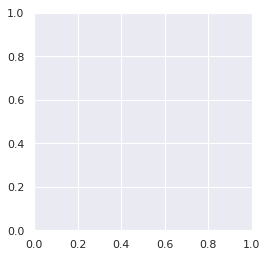

In [131]:
plt.imshow(wc, )
plt.axis('off')
plt.show()